<a href="https://colab.research.google.com/github/ladrianx/SQL/blob/main/ANALISIS_EXPLORATORIO_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice

1. [Introducción](#introduccion)
2. [Exploración de datos](#exploracion-de-datos)
  
  2.1. [Importar y explorar el paquete *Ecdat* en *R*](#importar-y-explorar-el-paquete-ecdat-en-r)

  2.2. [Importar y explorar datos referentes a Wallmart y Elektra](#importar-y-explorar-datos-referentes-a-wallmart-y-elektra)
  
  2.3. [Importar las bibliotecas y clases necesarias](#importar-las-bibliotecas-y-clases-necesarias)

  2.4. [Cargar y preparar los datos](#cargar-y-preparar-los-datos)

  2.5. [Dar formato a la fecha](#dar-formato-a-la-fecha)

  2.6. [Verificar los primeros registros del DataFrame](#verificar-los-primeros-registros-del-dataframe)

3. [Series de tiempo](#series-de-tiempo)

  3.1. [Gráficas en *Python* con *matplotlib*](#graficas-en-python-con-matplotlib)
  
  3.2. [Gráficas en *Python* con *seaborn*](#graficas-en-python-con-seaborn)

  3.3. [Gráficas en *R* con *plot*](#graficas-en-r-con-plot)

  3.4. [Gráficas en *R* con *ggplot2*](#graficas-en-r-con-ggplot2)

4. [Histogramas](#histogramas)

  4.1. [En *R* con *hist*](#en-r-con-hist)

  4.2. [En *R* con *ggplot*](#en-r-con-ggplot)

  4.3. [En *Python* con *histplot* de *seaborn*](#en-python-con-histplot-de-seaborn)

5. [Estimador de densidad de núcleo (KDE)](#estimador-de-densidad-de-nucleo-kde)

  5.1. [Sesgo y Varianza en Estadística](#sesgo-y-varianza-en-estadistica)

  5.2. [KDE con *R* usando *density*](#kde-con-r-usando-density)

  5.3. [KDE en *Python* usando *kdeplot*](#kde-en-python-usando-kdeplot)

  5.4. [KDE vs distribución normal](#kde-vs-distribucion-normal)

  5.5. [Desviación media absoluta (MAD)](#desviacion-media-absoluta-mad)

6. [Estadísticas de orden, CDF de muestra y cuantiles de muestra](#estadisticas-de-orden-cdf-de-muestra-y-cuantiles-de-muestra)

  6.1. [Función de Distribución Acumulada Muestral](#funcion-de-distribucion-acumulada-muestral)
  
  6.2. [Estadísticas de orden](#estadisticas-de-orden)

  6.3. [Cuantiles, percentiles, cuartiles, quantiles y deciles](#cuantiles-percentiles-cuartiles-quantiles-y-deciles)

  6.4. [Gráficas de probabilidad normal Q-Q](#graficas-de-probabilidad-normal-q-q)

  6.5. [Gráficas Q-Q en *R* con *qqnorm*](#grafica-q-q-en-r-con-qqnorm)

  6.6. [Gráficas Q-Q en *Python* con *ProbPlot*](#grafica-q-q-en-pyhton-con-propplot)

  6.7. [Gráficas seminormales](#graficas-seminormales)

  6.8. [Gráficas Q-Q](#graficas-qq)

7. [Pruebas de Normalidad](#pruebas-de-normalidad)

  7.1. [Prueba de Normalidad de Shapiro-Wilk en *R*](#Prueba-de-normalidad-de-shapiro-wilk-en-R)

8. [Gráfica de Caja](#grafica-de-caja)

  8.1. [Gráfica de Caja no estandarizada](#grafica-de-caja-no-estandarizada)

  8.2. [Gráfica de Caja estandarizada](#grafica-de-caja-estandarizada)

9. [Transformación de Datos](#transformacion-de-datos)

  9.1. [Transformación de Box-Cox](#transformacion-de-box-cox)

10. [La Geometría de las Transformaciones](#la-geometria-de-las-transformaciones)

11. [La Tranformación del KDE](#la-transformacion-del-kde)

  9.1. [Cambio de variable](#cambio-de-variable)

12. [Glosario](#glosario)


## Introducción

Esta práctica tiene como base el texto: *Statistics and Data Analysis for Financial Engineering with R examples* de los autores: David Ruppert y David S. Matteson.

El objetivo de este práctica es documentar, reconocer y explorar varios métodos para modelar y estimar distribuciones marginales, en particular, métodos gráficos tales como histogramas, estimaciones de densidad, cuantiles de muestra y gráficas de probabilidad a través del *software* estadístico *R*.

En la práctica usamos los datos de las acciones de WALMEX y ELEKTRA de los últimos 10 años para explorar su comportamiento con las técnicas y métodos documentados.

Aunque el enfoque se orienta principalmente al uso de *R*, también se integra el uso de *Python* y se propone un enfoque híbrido que aproveche las ventajas de ambos lenguajes: *Python+R*. Ello nos permitirá hacer un constrate y tener, cuando se requiera, un criterio de evaluación respecto a los métodos estadísticos que iremos explorando.    





## Exploración de datos

### Importar y explorar el paquete *Ecdat* en *R*

Definamos el entorno para trabajar con *R*

In [1]:
%load_ext rpy2.ipython

Intalamos la librería *Ecdat* que contiene un conjunto de bases de datos, como *Garch*, *Capm*, *SP500*, *Earnings* entre otras, para desarrollar los ejemplos que se presentan en el texto básico.

In [ ]:
%%R
# Instalar el paquete Ecdat si no está instalado
if (!require(Ecdat)) {
  install.packages("Ecdat")
}

# Cargar el paquete
library(Ecdat)

In [3]:
%%R
# Cargar los datos de la serie Garch
data("Garch", package = "Ecdat")

# Ver las primeras filas de la serie de datos
tail(Garch)

       date       day     dm           ddm     bp     cd       dy     sf
1862 870514  thursday 0.5613  0.0064343386 1.6800 0.7469 0.007183 0.6832
1863 870515    friday 0.5625  0.0021356121 1.6800 0.7457 0.007158 0.6839
1864 870518    monday 0.5611 -0.0024919913 1.6815 0.7451 0.007130 0.6832
1865 870519   tuesday 0.5646  0.0062183731 1.6865 0.7442 0.007165 0.6882
1866 870520 wednesday 0.5632 -0.0024827110 1.6805 0.7414 0.007147 0.6865
1867 870521  thursday 0.5627 -0.0008881784 1.6795 0.7421 0.007107 0.6861


In [4]:
%%R
# Cargar los datos de la serie Capm
data("Capm", package = "Ecdat")

# Ver las primeras filas de la serie de datos
tail(Capm)

    rfood   rdur   rcon   rmrf   rf
511 -8.32 -12.97 -12.69  -8.26 0.15
512  0.53   1.87   1.85   0.64 0.14
513 -5.12 -11.07 -12.58 -10.10 0.14
514  4.73   4.58   5.00   7.30 0.14
515 -1.31  15.63   0.99   5.96 0.12
516 -1.02  -4.89  -5.13  -5.42 0.11


In [5]:
%%R
# Cargar los datos de la serie Earnings
data("Earnings", package = "Ecdat")

# Ver las primeras filas de la serie de datos
head(Earnings)

  age      y
1  g3  569.5
2  g3  895.5
3  g3 1111.0
4  g3 1182.0
5  g3 1277.5
6  g3 1384.0


In [6]:
%%R
# Cargar los datos de la serie SP500
data("SP500", package = "Ecdat")

# Ver las primeras filas de la serie de datos
head(SP500)

        r500
1 -0.0117265
2  0.0024544
3  0.0110516
4  0.0190512
5 -0.0055657
6 -0.0043148


### Importar y explorar datos referentes a Walmart y Elektra

### Importar las bibliotecas y clases necesarias

In [7]:
# 'requests' se usa para enviar solicitudes HTTP en Python. Útil para el web
# scraping, interactuar con API web y descargar archivos de Internet
import requests
# 'numpy' es un paquete para la computación numérica en Python. Útil
# para manejar matrices, realizar operaciones matemáticas.
import numpy as np
# 'pandas' es una biblioteca de análisis y manipulación de datos. Útil para
# trabajar fácilmente con datos estructurados.
import pandas as pd
# 'yfinance' es usa para obtener datos históricos del mercado de Yahoo Finance.
import yfinance as yf

### Cargar y preparar los datos

In [8]:
#WALMEX.MX
accion = 'WALMEX.MX' # str(input('Escribe la sigla de la acción: '))
#['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
periodo = '10Y' # str(input('Periodo = '))
accion = yf.Ticker(accion)
df_walmex = accion.history(period=periodo)

In [9]:
#ELEKTRA.MX
accion = 'ELEKTRA.MX' # str(input('Escribe la sigla de la acción: '))
#['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
periodo = '10Y' # str(input('Periodo = '))
accion = yf.Ticker(accion)
df_elektra = accion.history(period=periodo)

### Dar formato a la fecha

In [10]:
df_walmex.index = df_walmex.index.date
df_elektra.index = df_elektra.index.date

### Verificar los primeros registros del DataFrame


In [11]:
print(df_walmex.info())
print(df_elektra.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 2014-09-23 to 2024-09-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2517 non-null   float64
 1   High          2517 non-null   float64
 2   Low           2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Volume        2517 non-null   int64  
 5   Dividends     2517 non-null   float64
 6   Stock Splits  2517 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 2014-09-23 to 2024-09-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2516 non-null   float64
 1   High          2516 non-null   float64
 2   Low           2516 non-null   float64
 3   Close         2516 non-null   float64
 4   Volume        2516 non-null   int64  
 5   Dividends     251

In [12]:
print(df_elektra.head())
print(df_walmex.head())

                  Open        High         Low       Close  Volume  Dividends  \
2014-09-23  350.885099  363.994579  348.828138  358.989655  429268        0.0   
2014-09-24  356.828446  367.786197  354.269097  365.805084  395855        0.0   
2014-09-25  365.823979  369.340718  361.056031  367.170013  155948        0.0   
2014-09-26  363.624887  366.648698  357.454061  365.388000  213016        0.0   
2014-09-29  360.202946  364.335787  356.885287  361.681671  156495        0.0   

            Stock Splits  
2014-09-23           0.0  
2014-09-24           0.0  
2014-09-25           0.0  
2014-09-26           0.0  
2014-09-29           0.0  
                 Open       High        Low      Close    Volume  Dividends  \
2014-09-23  28.544295  28.577311  28.238873  28.428728  14227347        0.0   
2014-09-24  28.544289  28.635086  28.354431  28.469997  12720256        0.0   
2014-09-25  28.436974  28.635082  27.661043  27.776609  32334708        0.0   
2014-09-26  27.776621  28.230621  2

## Series de tiempo



Definamos la columna *return* con base en el precio de cierre y a partir de $r_t =  \frac{P_t - P_{t-1}}{P_{t-1}}$

In [13]:
df_walmex['return'] = (df_walmex['Close']  / df_walmex['Close'].shift(1)) - 1
df_elektra['return'] = (df_elektra['Close'] / df_elektra['Close'].shift(1)) - 1

y la columna *Return* con base en el precio de cierre y a partir de $r_t = \log \frac{P_t}{P_{t-1}}$.

In [14]:
df_walmex['Return'] = np.log(df_walmex['Close'] / df_walmex['Close'].shift(1))
df_elektra['Return'] = np.log(df_elektra['Close'] / df_elektra['Close'].shift(1))

A menos que se indique lo contrario suponemos que la series consideradas corresponden a retornos o rendimientos logaritmicos

### Gráficas en *Python* con *matplotlib*

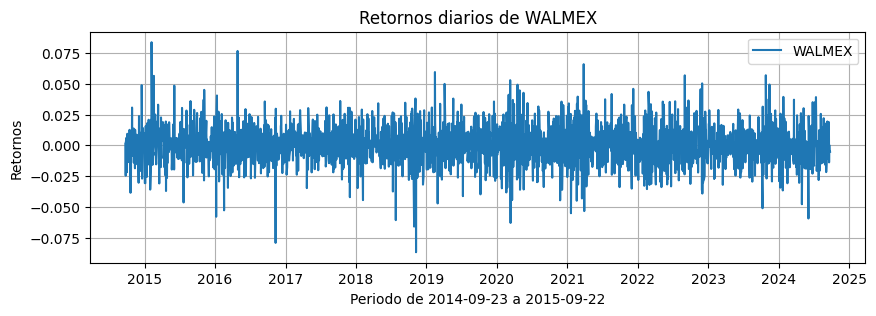

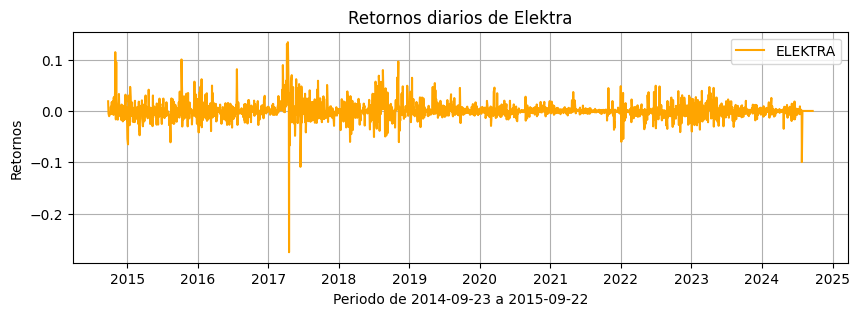

In [15]:
import matplotlib.pyplot as plt

# Gráfico para df_walmex
plt.figure(figsize=(10, 3))  # Ajustar el tamaño de la figura
plt.plot(df_walmex['Return'], label='WALMEX')
plt.title('Retornos diarios de WALMEX')
plt.xlabel(f'Periodo de {df_walmex.index[0]} a {df_walmex.index[250]}')
plt.ylabel('Retornos')
plt.legend()
plt.grid(True)
plt.show()
print(" ")

# Gráfico para df_elektra
plt.figure(figsize=(10, 3))  # Ajustar el tamaño de la figura
plt.plot(df_elektra['Return'], label='ELEKTRA', color='orange')
plt.title('Retornos diarios de Elektra')
plt.xlabel(f'Periodo de {df_elektra.index[0]} a {df_elektra.index[250]}')
plt.ylabel('Retornos')
plt.legend()
plt.grid(True)
plt.show()

### Gráficas en *Python* con *seaborn*

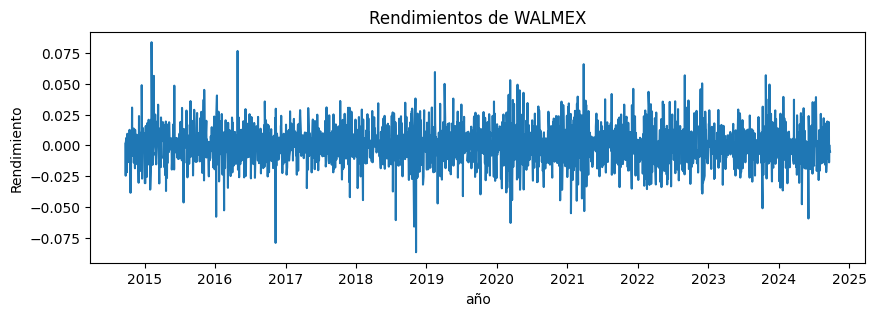

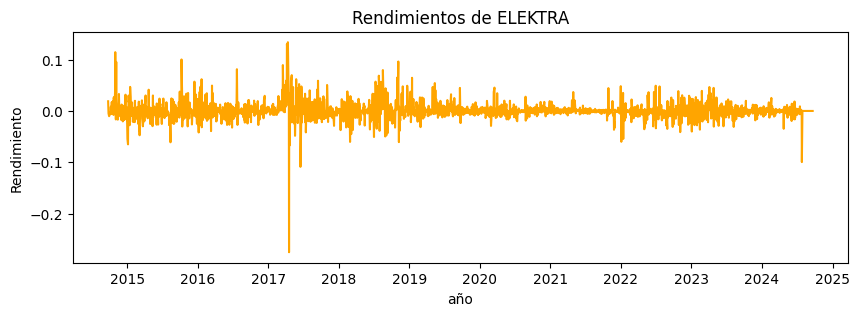

In [16]:
import seaborn as sns

# Visualizar los retornos logarítmicos
plt.figure(figsize=(10, 3))
sns.lineplot(df_walmex['Return'] )
plt.title('Rendimientos de WALMEX')
plt.xlabel('año')
plt.ylabel('Rendimiento')
plt.show()
print(" ")

plt.figure(figsize=(10, 3))
sns.lineplot(df_elektra['Return'], color='orange' )
plt.title('Rendimientos de ELEKTRA')
plt.xlabel('año')
plt.ylabel('Rendimiento')
plt.show()

Guardamos las bases de datos para poder usaarlas en *R*

In [17]:
df_walmex.to_csv('/content/drive/MyDrive/Colab Notebooks/Finance/Análisis exploratorio de datos/df_walmex.csv')
df_elektra.to_csv('/content/drive/MyDrive/Colab Notebooks/Finance/Análisis exploratorio de datos/df_elektra.csv')

### Gráficas en *R* con *plot*

Veamos las gráficas de *Ecdat* descritas en el libro de texto.

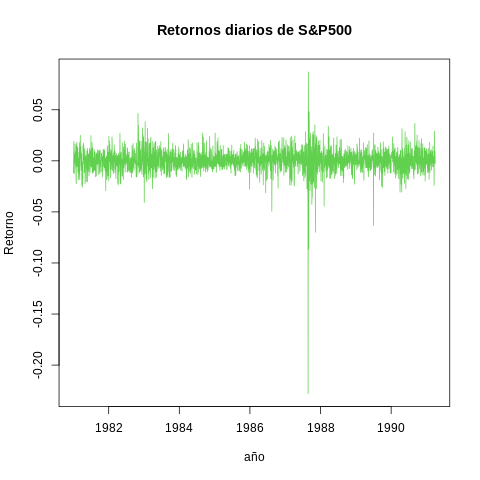

In [18]:
%%R
SPreturn = SP500$r500
n = length(SPreturn)
year_SP = 1981 + (1:n)*(1991.25 - 1981)/n
plot(year_SP, SPreturn, main = "Retornos diarios de S&P500",
xlab = "año", col = 35, type = "l", ylab = "Retorno")

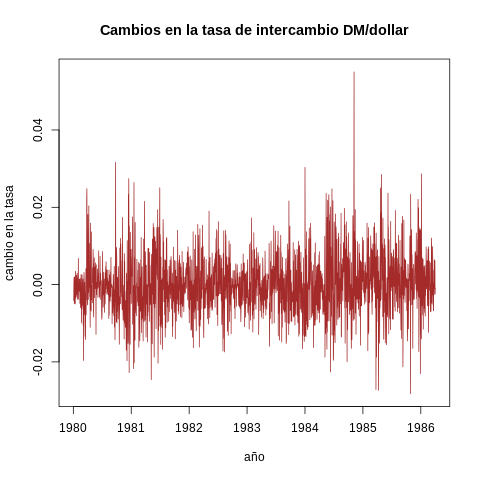

In [19]:
%%R
ddm = Garch$ddm
n = length(ddm)
year_ddm = 1980 + (1:n)*(1986.25 - 1980)/n
plot(year_ddm, ddm, main = "Cambios en la tasa de intercambio DM/dollar",
xlab = "año", col = "brown", type = "l", ylab = "cambio en la tasa")

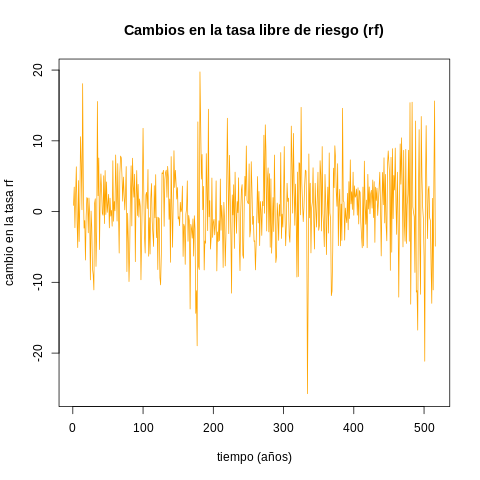

In [20]:
%%R
rf = Capm$rdur
#n = length(dm)
#year_rf = 0 + (1:n)*(516 - 0)/n
plot(rf, main = "Cambios en la tasa libre de riesgo (rf)",
xlab = "tiempo (años)", col = "orange", type = "l", ylab = "cambio en la tasa rf")

Leemos los datos de WALMEX y ELEKTRA para usarlos en *R*

In [ ]:
%R df_walmex <- read.csv("/content/drive/MyDrive/Colab Notebooks/Finance/Análisis exploratorio de datos/df_walmex.csv")
%R df_elektra <- read.csv("/content/drive/MyDrive/Colab Notebooks/Finance/Análisis exploratorio de datos/df_elektra.csv")

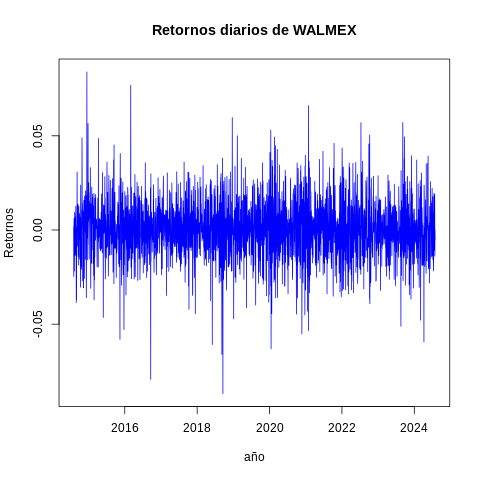

In [22]:
%%R
WMreturn <- df_walmex$Return
n = length(WMreturn)
year_WM <- 2014.58 + (1:n)*(2024.58-2014.58)/n
plot(year_WM, WMreturn, main = "Retornos diarios de WALMEX" ,
xlab = "año", col = "blue", type = "l", ylab = "Retornos")

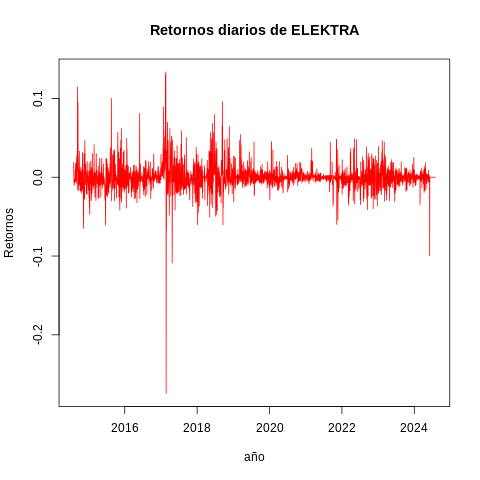

In [23]:
%%R
EMreturn <- df_elektra$Return
n = length(EMreturn)
year_EM <- 2014.58 + (1:n)*(2024.58-2014.58)/n
plot(year_EM, EMreturn, main = "Retornos diarios de ELEKTRA",
xlab = "año", col = "red", type = "l", ylab = "Retornos")

### Gráficas en *R* con *ggplot2*

In [ ]:
%%R
install.packages("ggplot2")
library(ggplot2)

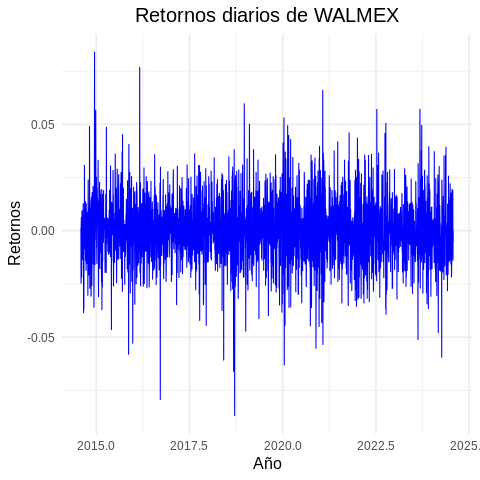

In [25]:
%%R
# Crear un DataFrame con los datos
data <- data.frame(
  year_WM = year_WM,
  WMreturn = WMreturn
)
# Crear el gráfico usando ggplot2
ggplot(data, aes(x = year_WM, y = WMreturn)) + geom_line(colour = "blue") +
  labs(title = "Retornos diarios de WALMEX",x = "Año",y = "Retornos") +
  theme_minimal(base_size = 16) + # Ajustar el tamaño del texto y elementos del gráfico
  theme(
    plot.title = element_text(size = 20, hjust = 0.5), # Tamaño del título
    axis.title.x = element_text(size = 16), # Tamaño del título del eje x
    axis.title.y = element_text(size = 16), # Tamaño del título del eje y
    axis.text = element_text(size = 12) # Tamaño del texto de los ejes
  )

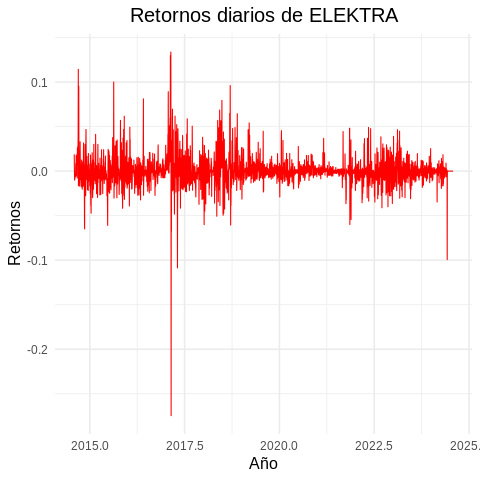

In [26]:
%%R
# Crear un DataFrame con los datos
data <- data.frame(
  year_EM = year_EM,
  EMreturn = EMreturn
)
# Crear el gráfico usando ggplot2
ggplot(data, aes(x = year_EM, y = EMreturn)) + geom_line(colour = "red") +
  labs(title = "Retornos diarios de ELEKTRA",x = "Año",y = "Retornos") +
  theme_minimal(base_size = 16) + # Ajustar el tamaño del texto y elementos del gráfico
  theme(
    plot.title = element_text(size = 20, hjust = 0.5), # Tamaño del título
    axis.title.x = element_text(size = 16), # Tamaño del título del eje x
    axis.title.y = element_text(size = 16), # Tamaño del título del eje y
    axis.text = element_text(size = 12) # Tamaño del texto de los ejes
  )

## Histogramas

Una **función de densidad de probabilidad** (PDF) es una función que describe la probabilidad de que una variable aleatoria continua tome un valor particular.

El **histograma** es un *estimador simple (burdo) de funciones de densidad de probabilidad* (PDF).

Los valores atípicos son difíciles, o quizás imposibles, de ver en el histograma. Cuando el tamaño de la muestra es muy grande, una celda con una frecuencia pequeña es esencialmente invisible.



### En *R* con *hist*

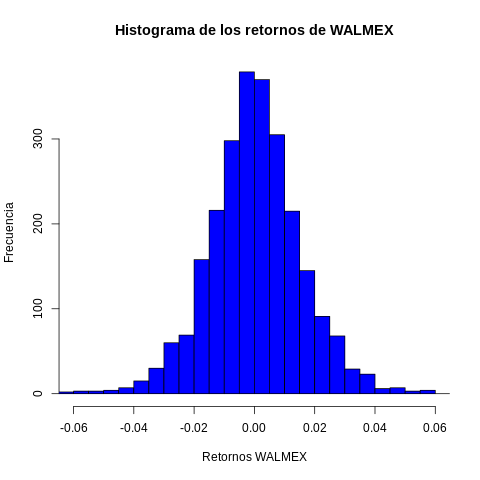

breaks,[RTYPES.REALSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


In [27]:
%R hist(WMreturn, breaks=50, xlim = c(-0.06, 0.06), col = "blue", main="Histograma de los retornos de WALMEX", xlab="Retornos WALMEX",ylab="Frecuencia")

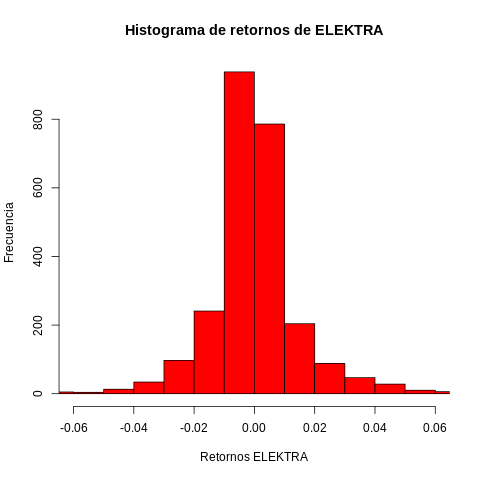

breaks,[RTYPES.REALSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


In [28]:
%R hist(EMreturn, breaks=50, col = "red", xlim = c(-0.06, 0.06), main="Histograma de retornos de ELEKTRA", xlab="Retornos ELEKTRA",ylab="Frecuencia")

### En *R* con *ggplot*

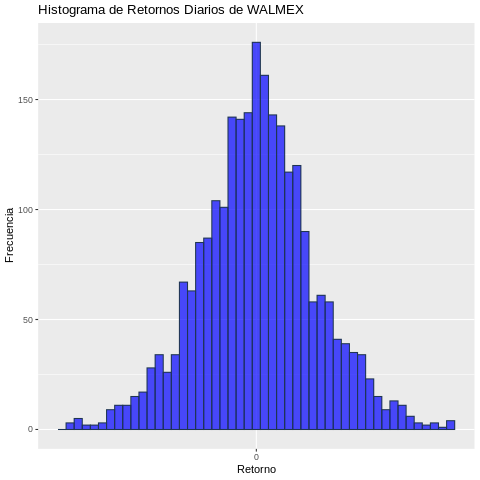

In [29]:
%%R
data <- data.frame(
  year_WM = year_WM,
  WMreturn = WMreturn
)
ggplot(data, aes(x = WMreturn)) +
  geom_histogram(bins = 50, fill = "blue", colour = "#1F3552", alpha = 0.7) +
  labs(title = "Histograma de Retornos Diarios de WALMEX") +
       scale_x_continuous(name = "Retorno",
                           breaks = seq(0, 175, 25),
                           limits=c(-0.05, 0.05)) +
        scale_y_continuous(name = "Frecuencia")

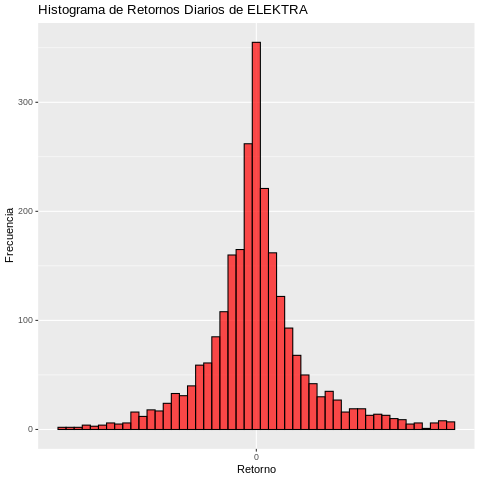

In [30]:
%%R
data <- data.frame(
  year_EM = year_EM,
  EMreturn = EMreturn
)
ggplot(data, aes(x = EMreturn)) +
  geom_histogram(bins = 50, fill = "red", colour = "black", alpha = 0.7) +
  labs(title = "Histograma de Retornos Diarios de ELEKTRA") +
       scale_x_continuous(name = "Retorno",
                           breaks = seq(0, 175, 25),
                           limits=c(-0.05, 0.05)) +
        scale_y_continuous(name = "Frecuencia")

### En *Python* con *histplot* de *seaborn*

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

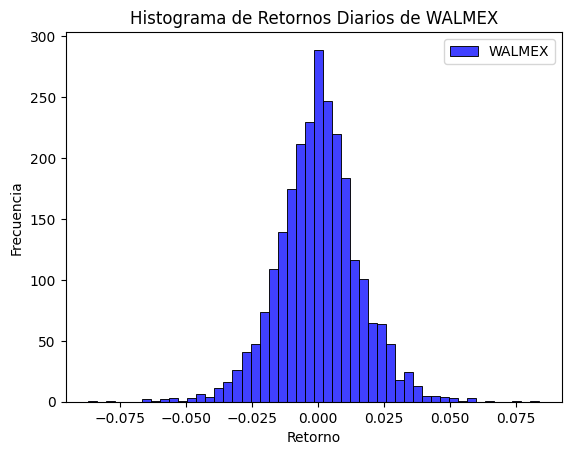

In [31]:
sns.histplot(df_walmex['Return'], bins=50, color='blue', label='WALMEX')
plt.title('Histograma de Retornos Diarios de WALMEX')
plt.xlabel('Retorno')
plt.ylabel('Frecuencia')
plt.legend()
plt

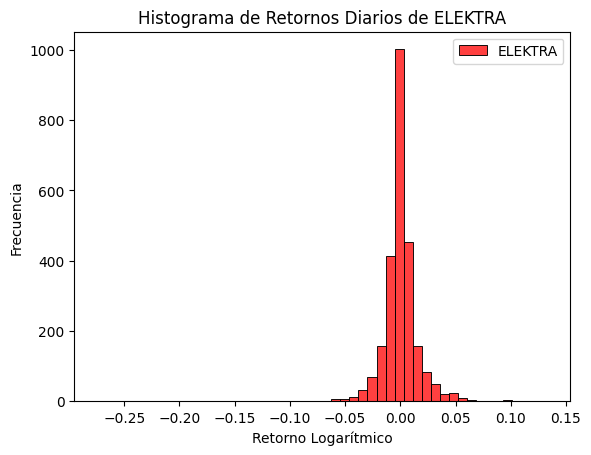

In [32]:
sns.histplot(df_elektra['Return'], bins=50, color='red', label='ELEKTRA')
plt.title('Histograma de Retornos Diarios de ELEKTRA')
plt.xlabel('Retorno Logarítmico')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## Estimador de densidad de núcleo (KDE)

El **estimador de densidad de núcleo** (KDE) es una técnica no paramétrica, es decir, que no asumen una forma o distribución específica para estimar la función de densidad de probabilidad de una variable aleatoria (PDF). Es una alternativa a los histogramas para representar la distribución de datos de manera más suave y continua.


* *Kernel:* Es una función suave y simétrica que se centra en cada punto de datos y se extiende a su alrededor.
* *Ancho de Banda (Bandwidth)*: Determina el ancho de las funciones kernel. Un ancho de banda más pequeño captura más detalles de la distribución, mientras que uno más grande proporciona una curva más suave.
* *Estimación*: La estimación de densidad se obtiene sumando todas las funciones kernel centradas en cada punto de datos.

* La fórmula del estimador de densidad de núcleo (KDE) de $\{Y_1,...,Y_n\}$ es
$$
\hat{f}(y) = \frac{1}{n b} \sum_{i=1}^{n} K\left(\frac{y - Y_i}{b}\right)
$$
donde:
  * $\hat{f}(y)$ es la estimación de la densidad en el punto $y$.
  * $n$ es el número de puntos de datos.
  * $b$ es el ancho de banda.
  * $K(\cdot)$ es la función kernel K(⋅), que generalmente es una función simétrica e integrable, como la función gaussiana.

* El *sesgo* del estimador de densidad del kernel aumenta con el aumento del ancho de banda $b$. Un valor grande de $b$ produce una estimación más suave y con menor variabilidad, pero puede no capturar los detalles de la distribución subyacente, lo que resulta en un alto sesgo.
* La *varianza* del estimador de densidad del kernel disminuye con el aumento del ancho de banda
$b$. Un valor pequeño de $b$ produce una estimación que sigue de cerca los datos de muestra, lo que resulta en una baja varianza pero puede llevar a un ajuste excesivo y a una estimación ruidosa.



### Sesgo y Varianza en Estadística

En estadística, el $\textbf{sesgo}$ y la $\textbf{varianza}$ son conceptos fundamentales para evaluar la calidad de los estimadores.

El *sesgo* de un estimador $\hat{\theta}$ de un parámetro $\theta$ es la diferencia entre el valor esperado del estimador y el verdadero valor del parámetro:

$$
\text{Sesgo}(\hat{\theta}) = \mathbb{E}[\hat{\theta}] - \theta
$$

La *varianza* de un estimador $\hat{\theta}$ mide la variabilidad de las estimaciones alrededor de su valor esperado:

$$
\text{Varianza}(\hat{\theta}) = \mathbb{E}[(\hat{\theta} - \mathbb{E}[\hat{\theta}])^2]
$$

El *error cuadrático medio* (MSE) de un estimador $\hat{\theta}$ es una medida de la calidad del estimador que combina el sesgo y la varianza:

$$
\text{MSE}(\hat{\theta}) = \mathbb{E}[(\hat{\theta} - \theta)^2]
$$

El MSE se puede descomponer en sesgo y varianza:

$$
\text{MSE}(\hat{\theta}) = \text{Varianza}(\hat{\theta}) + (\text{Sesgo}(\hat{\theta}))^2
$$

### KDE con *R* usando *density*

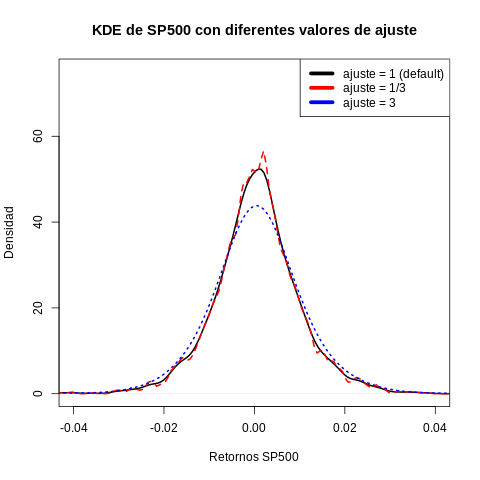

In [33]:
%%R
#SPreturn <- SP500$r500
kde_default <- density(SPreturn)
kde_adjust_1_3 <- density(SPreturn, adjust = 1/3)
kde_adjust_3 <- density(SPreturn, adjust = 3)

plot(kde_default, main = "KDE de SP500 con diferentes valores de ajuste", ylim = c(0,75),
     xlab = "Retornos SP500", ylab = "Densidad", col = "black", lwd = 2, xlim = c(-0.04, 0.04))
lines(kde_adjust_1_3, col = "red", lwd = 2, lty=2)
lines(kde_adjust_3, col = "blue", lwd = 2, lty=3)

legend("topright", legend = c("ajuste = 1 (default)", "ajuste = 1/3", "ajuste = 3"),
       col = c("black", "red", "blue"), lwd = 5)

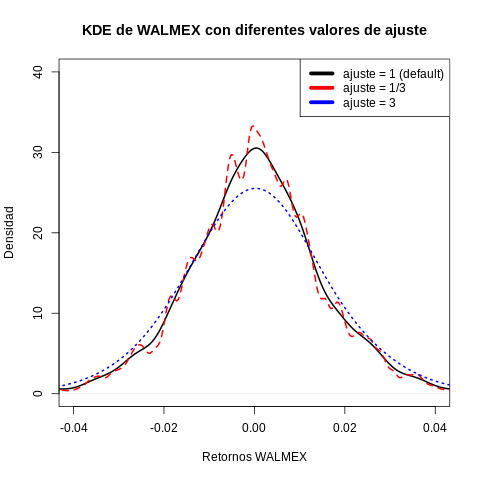

In [34]:
%%R
WMreturn <- na.omit(WMreturn)
WM_kde_default <- density(WMreturn)
WM_kde_adjust_1_3 <- density(WMreturn, adjust = 1/3)
WM_kde_adjust_3 <- density(WMreturn, adjust = 3)

plot(WM_kde_default, main = "KDE de WALMEX con diferentes valores de ajuste", ylim = c(0,40),
     xlab = "Retornos WALMEX", ylab = "Densidad", col = "black", lwd = 2, xlim = c(-0.04, 0.04))
lines(WM_kde_adjust_1_3, col = "red", lwd = 2, lty=2)
lines(WM_kde_adjust_3, col = "blue", lwd = 2, lty=3)

legend("topright", legend = c("ajuste = 1 (default)", "ajuste = 1/3", "ajuste = 3"),
       col = c("black", "red", "blue"), lwd = 5)

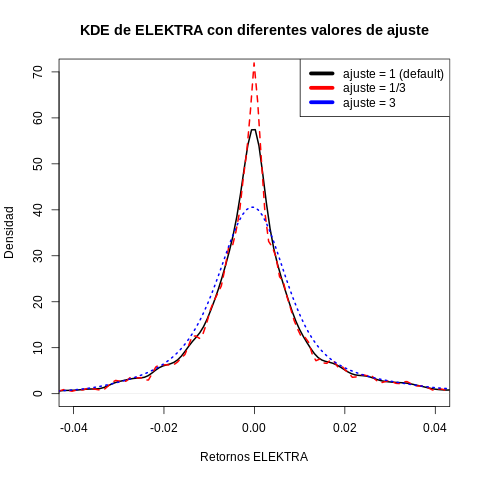

In [35]:
%%R
EMreturn <- na.omit(EMreturn)
EM_kde_default <- density(EMreturn)
EM_kde_adjust_1_3 <- density(EMreturn, adjust = 1/3)
EM_kde_adjust_3 <- density(EMreturn, adjust = 3)

plot(EM_kde_default, main = "KDE de ELEKTRA con diferentes valores de ajuste", ylim = c(0,70),
     xlab = "Retornos ELEKTRA", ylab = "Densidad", col = "black", lwd = 2, xlim = c(-0.04, 0.04),lty=1)
lines(EM_kde_adjust_1_3, col = "red", lwd = 2, lty=2)
lines(EM_kde_adjust_3, col = "blue", lwd = 2, lty=3)

legend("topright", legend = c("ajuste = 1 (default)", "ajuste = 1/3", "ajuste = 3"),
       col = c("black", "red", "blue"), lwd = 5)

En general podemos observar que:

* La curva discontinua (roja) correspondiente a ajustar = 1/3 se mueve, lo que indica demasiada variabilidad aleatoria; tal curva se llama subsuavizada y *sobreajustada*.

* La curva de puntos (azul) es muy suave pero subestima el pico cercano a $0$, una señal de sesgo. Esta curva se denomina sobresuavizada o *subajustada*.

* Generalmente, el ajuste estará mucho más cerca de 1

* A menudo se utiliza una estimación de la densidad del núcleo para sugerir un modelo estadístico paramétrico.

* Aunque es sencillo de calcular, KDE tiene algunos problemas. En particular, suele tener demasiados baches en las colas.



### KDE en *Python* usando *kdeplot*

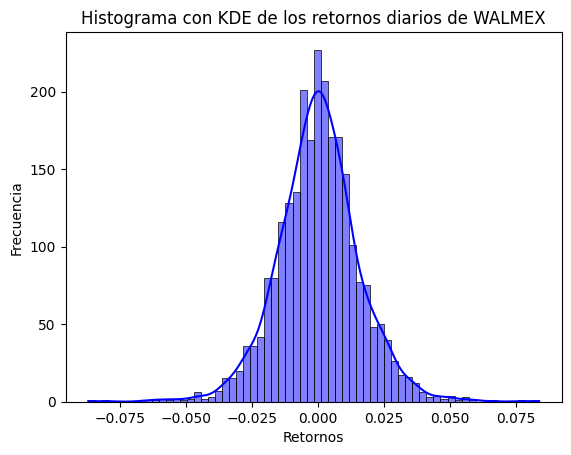

In [36]:
sns.histplot(data=df_walmex, x='Return', kde = True, color='blue')
plt.title('Histograma con KDE de los retornos diarios de WALMEX')
plt.xlabel('Retornos')
plt.ylabel('Frecuencia')
plt.show()

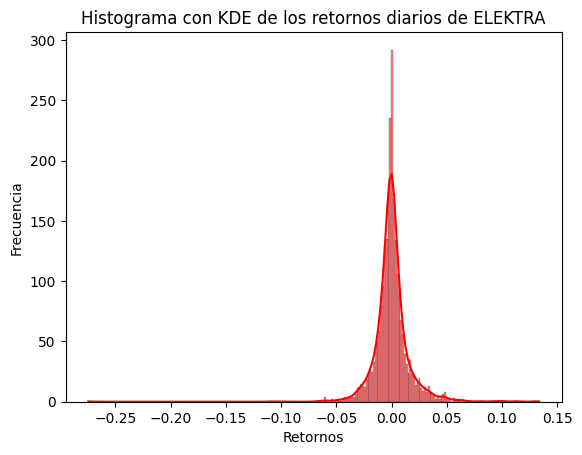

In [37]:
sns.histplot(data=df_elektra, x='Return', kde = True, color='red')
plt.title('Histograma con KDE de los retornos diarios de ELEKTRA')
plt.xlabel('Retornos')
plt.ylabel('Frecuencia')
plt.show()

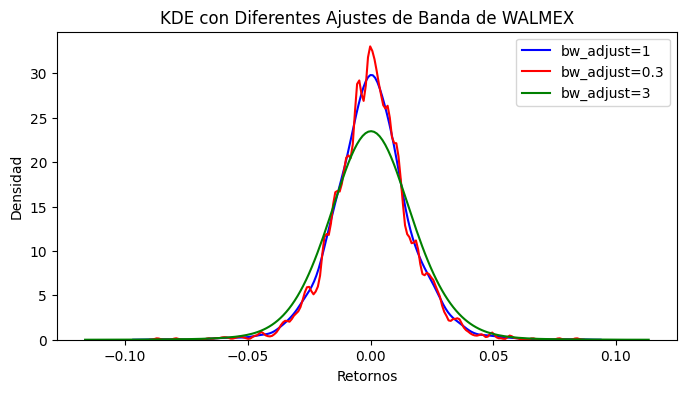

In [38]:
# Crear la gráfica
plt.figure(figsize=(8, 4))

# Gráfico de densidad con bw_adjust=1
sns.kdeplot(data=df_walmex, x='Return', bw_adjust=1, label='bw_adjust=1', color='blue',)

# Gráfico de densidad con bw_adjust=0.3
sns.kdeplot(data=df_walmex, x='Return', bw_adjust=0.3, label='bw_adjust=0.3', color='red')

# Gráfico de densidad con bw_adjust=3
sns.kdeplot(data=df_walmex, x='Return', bw_adjust=3, label='bw_adjust=3', color='green')

# Añadir título y etiquetas
plt.title('KDE con Diferentes Ajustes de Banda de WALMEX')
plt.xlabel('Retornos')
plt.ylabel('Densidad')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

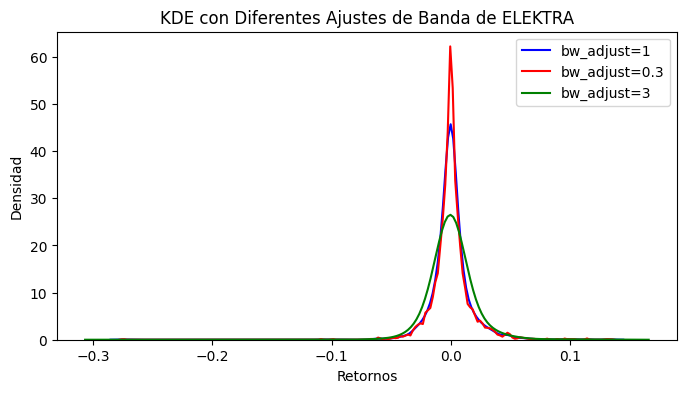

In [39]:
# Crear la gráfica
plt.figure(figsize=(8, 4))

# Gráfico de densidad con bw_adjust=1
sns.kdeplot(data=df_elektra, x='Return', bw_adjust=1, label='bw_adjust=1', color='blue',)

# Gráfico de densidad con bw_adjust=0.3
sns.kdeplot(data=df_elektra, x='Return', bw_adjust=0.3, label='bw_adjust=0.3', color='red')

# Gráfico de densidad con bw_adjust=3
sns.kdeplot(data=df_elektra, x='Return', bw_adjust=3, label='bw_adjust=3', color='green')

# Añadir título y etiquetas
plt.title('KDE con Diferentes Ajustes de Banda de ELEKTRA')
plt.xlabel('Retornos')
plt.ylabel('Densidad')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

### KDE vs distribución normal

Veamos el comparativo entre KDE con ajuste igual a 1 y la distribución normal

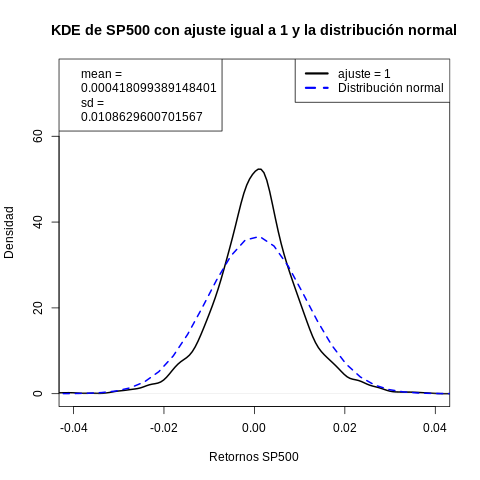

In [40]:
%%R
kde_default <- density(SPreturn,adjust=1)

# Parámetros de la distribución normal teórica
mean_SP <- mean(SPreturn)
sd_SP <- sd(SPreturn)
x <- seq(min(SPreturn), max(SPreturn), length.out = 100)
y <- dnorm(x, mean = mean_SP, sd = sd_SP)

plot(kde_default, main = "KDE de SP500 con ajuste igual a 1 y la distribución normal", ylim = c(0,75),
     xlab = "Retornos SP500", ylab = "Densidad", col = "black", lwd = 2, xlim = c(-0.04, 0.04))
lines(x, y, col = "blue", lwd = 2, lty = 2)  # Agregar distribución normal

# Leyenda
legend("topright", legend = c("ajuste = 1", "Distribución normal"),
       col = c("black", "blue"), lwd = 3, lty = c(1, 2))
legend("topleft", legend = c("mean =", mean_SP, "sd =", sd_SP))

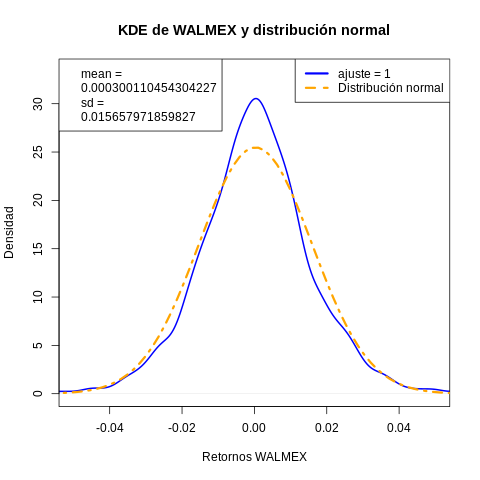

In [41]:
%%R
# Estimación de densidad del kernel con ajuste igual a 1
WM_kde_default <- density(WMreturn,adjust = 1)

# Parámetros de la distribución normal teórica
mean_WM <- mean(WMreturn)
sd_WM <- sd(WMreturn)
x <- seq(min(WMreturn), max(WMreturn), length.out = 100)
y <- dnorm(x, mean = mean_WM, sd = sd_WM)

# Graficar KDE y distribución normal
plot(WM_kde_default, main = "KDE de WALMEX y distribución normal",
     ylim = range(0, max(WM_kde_default$y, WM_kde_adjust_1_3$y, WM_kde_adjust_3$y, y)),
     xlab = "Retornos WALMEX", ylab = "Densidad", col = "blue", lwd = 2, xlim =c(-0.05,0.05), lty = 1)
lines(x, y, col = "orange", lwd = 3, lty = 4)  # Agregar distribución normal

# Leyenda
legend("topright", legend = c("ajuste = 1", "Distribución normal"),
       col = c("blue","orange"), lwd = 3, lty = c(1, 2))
legend("topleft", legend = c("mean =", mean_WM, "sd =", sd_WM))

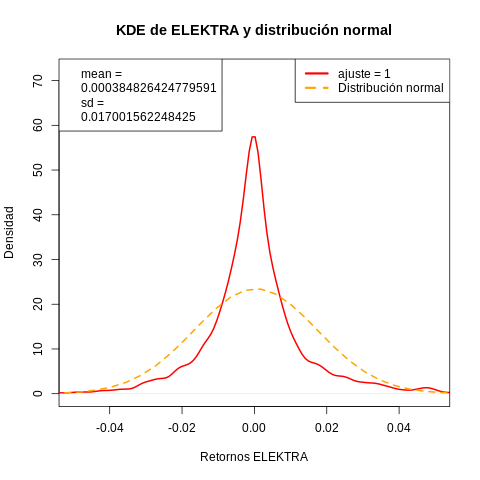

In [42]:
%%R
# Estimación de densidad del kernel con ajuste igual a 1
EM_kde_default <- density(EMreturn,adjust=1)

# Parámetros de la distribución normal teórica
mean_EM <- mean(EMreturn)
sd_EM <- sd(EMreturn)
x <- seq(min(EMreturn), max(EMreturn), length.out = 100)
y <- dnorm(x, mean = mean_EM, sd = sd_EM)

# Graficar KDE y distribución normal
plot(EM_kde_default, main = "KDE de ELEKTRA y distribución normal",
     ylim = range(0, max(EM_kde_default$y, EM_kde_adjust_1_3$y, EM_kde_adjust_3$y, y)),
     xlab = "Retornos ELEKTRA", ylab = "Densidad", col = "red", lwd = 2, xlim =c(-0.05,0.05), lty = 1)
lines(x, y, col = "orange", lwd = 2, lty = 2)  # Agregar distribución normal

# Leyenda
legend("topright", legend = c("ajuste = 1", "Distribución normal"),
       col = c("red","orange"), lwd = 3, lty = c(1, 2))
legend("topleft", legend = c("mean =", mean_EM, "sd =", sd_EM))

En general, se puede obervar que la KDE y la densidad normal son diferentes. La razón es que los rendimientos atípicos inflan la desviación estándar de la muestra y hacen que la densidad normal ajustada esté demasiado dispersa en el medio de los datos.

### Desviación media absoluta (MAD)

La desviación media absoluta es una medida robusta de la dispersión estadística. Es particularmente útil para identificar valores atípicos en un conjunto de datos y para obtener estadísticas sólidas, ya que es menos sensible a los valores atípicos que la desviación estándar.

Para calcular la MAD, se siguen los siguientes pasos:
* Calcular la mediana del conjunto de datos.
* Calcular las desviaciones absolutas respecto a la mediana.
* Calcular la mediana de estas desviaciones absolutas.

La fórmula para el estimador MAD es:

$$
\text{MAD} = \text{mediana}(|X_i - \text{mediana}(X)|)
$$

donde $X_i$ representa los elementos del conjunto de datos.

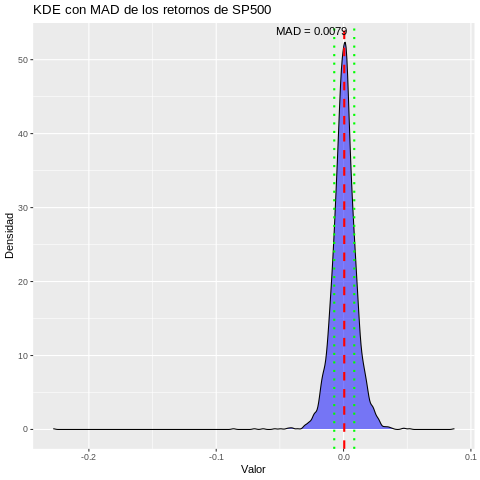

In [43]:
%%R
# Calcula la MAD
mad_value <- mad(SPreturn)

# Convierte SPreturn a un data frame para usarlo con ggplot
SPreturn_df <- data.frame(SPreturn = SPreturn)

# Grafica KDE con las líneas de la mediana y MAD
library(ggplot2)

ggplot(SPreturn_df, aes(x = SPreturn)) +
  geom_density(fill = "blue", alpha = 0.5) +
  geom_vline(xintercept = median(SPreturn), color = "red", linetype = "dashed", size = 1) +
  geom_vline(xintercept = median(SPreturn) + mad_value, color = "green", linetype = "dotted", size = 1) +
  geom_vline(xintercept = median(SPreturn) - mad_value, color = "green", linetype = "dotted", size = 1) +
  labs(title = "KDE con MAD de los retornos de SP500",
       x = "Valor", y = "Densidad") +
  annotate("text", x = median(SPreturn) + mad_value, y = Inf, label = paste("MAD =", round(mad_value, 4)), vjust = 1.5, hjust = 1.1, color = "black", size = 4)

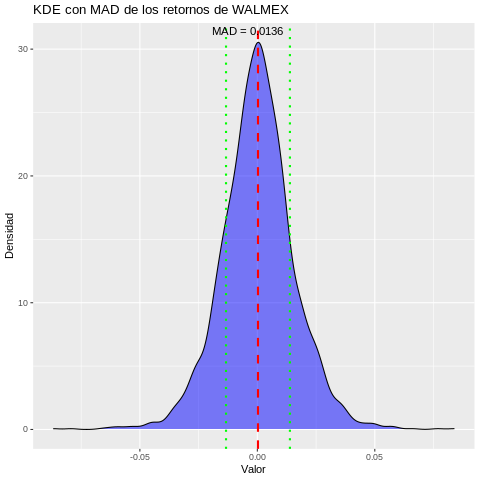

In [44]:
%%R
# Calcula la MAD
mad_value <- mad(WMreturn)

# Convierte SPreturn a un data frame para usarlo con ggplot
WMreturn_df <- data.frame(WMreturn = WMreturn)

# Grafica KDE con las líneas de la mediana y MAD
ggplot(WMreturn_df, aes(x = WMreturn)) +
  geom_density(fill = "blue", alpha = 0.5) +
  geom_vline(xintercept = median(WMreturn), color = "red", linetype = "dashed", size = 1) +
  geom_vline(xintercept = median(WMreturn) + mad_value, color = "green", linetype = "dotted", size = 1) +
  geom_vline(xintercept = median(WMreturn) - mad_value, color = "green", linetype = "dotted", size = 1) +
  labs(title = "KDE con MAD de los retornos de WALMEX",
       x = "Valor", y = "Densidad") +
    annotate("text", x = median(SPreturn) + mad_value, y = Inf, label = paste("MAD =", round(mad_value, 4)), vjust = 1.5, hjust = 1.1, color = "black", size = 4)

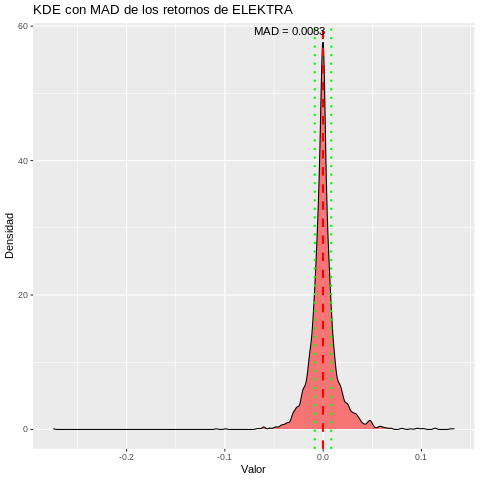

In [45]:
%%R
# Calcula la MAD
mad_value <- mad(EMreturn)

# Convierte SPreturn a un data frame para usarlo con ggplot
EMreturn_df <- data.frame(EMreturn = EMreturn)

# Grafica KDE con las líneas de la mediana y MAD
ggplot(EMreturn_df, aes(x = EMreturn)) +
  geom_density(fill = "red", alpha = 0.5) +
  geom_vline(xintercept = median(EMreturn), color = "red", linetype = "dashed", size = 1) +
  geom_vline(xintercept = median(EMreturn) + mad_value, color = "green", linetype = "dotted", size = 1) +
  geom_vline(xintercept = median(EMreturn) - mad_value, color = "green", linetype = "dotted", size = 1) +
  labs(title = "KDE con MAD de los retornos de ELEKTRA",
       x = "Valor", y = "Densidad") +
    annotate("text", x = median(SPreturn) + mad_value, y = Inf, label = paste("MAD =", round(mad_value, 4)), vjust = 1.5, hjust = 1.1, color = "black", size = 4)

## Función de Distribución Acumulada Muestral

Supongamos que $Y_1, Y_2,\ldots , Y_n$ es una muestra aleatoria de una distribución de probabilidad con una función de distribución acumulada $F$. A continuación estimamos $F$ y sus cuantiles. La **Función de Distribución Acumulada** (CDF) **muestral** o **empírica** $F_n(y)$ se define como *la proporción de la muestra que es menor o igual que $y$*. De forma general se define como
$$
F_n(y) = \frac{\sum_{i=1}^{n} I\{Y_i\leq y\}}{n}
$$
donde $I\{\cdot\}$ es la función indicadora y satisface que $I\{Y_i\leq y\} = 1$ si $Y_i\leq y$ y es igual a $0$ en caso contrario.

Veamos ahora un ejemplo en *R* y las gráficas correspondientes a WALMEX y ELEKTRA


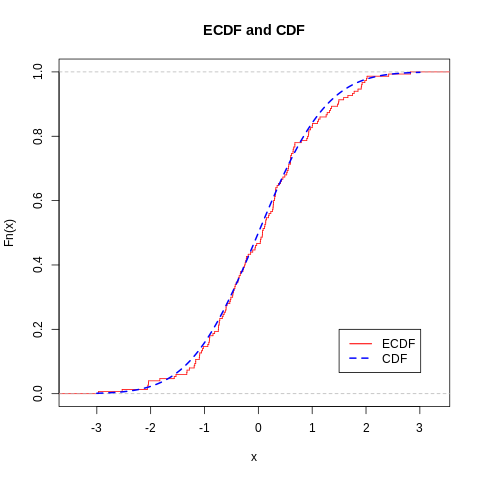

In [46]:
%%R
set.seed("991155")

## genera 150 valores aleatorios a partir de una distribución normal estándar
## y usa ecdf() para calcular la función de distribución empírica
edf_norm = ecdf(rnorm(150))

## Configura la ventana gráfica
par(mfrow = c(1, 1))

## Dibuja la función de distribución empírica
## verticals = TRUE indica que se dibujen líneas verticales en cada salto de
## la EDF, y do.p = FALSE evita que se dibujen puntos en los saltos
plot(edf_norm, verticals = TRUE, do.p = FALSE, col = "red", main = "ECDF and CDF")

## Añade la función de distribución acumulativa. Crea una secuencia de
## valores desde -3 hasta 3 en incrementos de 0.01 para usar como puntos
## de evaluación de la CDF teórica
tt = seq(from = -3, to = 3, by = 0.01)
lines(tt, pnorm(tt), lty = 2, lwd = 2, col = "blue")

## Añade una leyenda
legend(1.5, 0.2, c("ECDF", "CDF"), lty = c(1, 2),
       lwd = c(1.5, 2), col = c("red", "blue"))

En la siguiente gráfica se compara la función de distribución empírica (ECDF) de los retornos de WALMEX con la función de distribución acumulativa teórica (CDF) de una distribución normal con la misma media y desviación estándar que tienen los retornos de WALMEX.

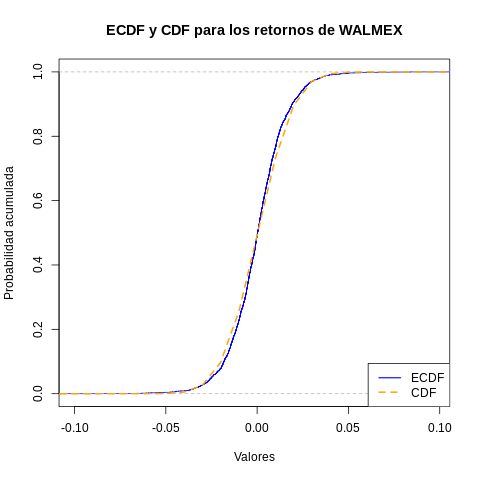

In [47]:
%%R
set.seed("991156")

# Calcule el ECDF usando los datos en WMreturn
edf_wmreturn <- ecdf(WMreturn)

# Configurar la ventana
par(mfrow = c(1, 1))

# Gráfica de ECDF
plot(edf_wmreturn, verticals = TRUE, do.p = FALSE, col = "blue",main = "ECDF y CDF para los retornos de WALMEX",
     xlab = "Valores", ylab = "Probabilidad acumulada")

# Agregue la función de distribución acumulativa teórica (CDF) para la distribución normal
tt <- seq(from = -3, to = 3, by = 0.01)
lines(tt, pnorm(tt, mean(WMreturn), sd(WMreturn)), lty = 2, lwd = 2, col = "orange")

# Agregar etiquetas
legend("bottomright", c("ECDF", "CDF"), lty = c(1, 2),
       lwd = c(1.5, 2), col = c("blue", "orange"))

En la siguiente gráfica se compara la función de distribución empírica (ECDF) de los retornos de ELEKTRA con la función de distribución acumulativa teórica (CDF) de una distribución normal con la misma media y desviación estándar que tienen los retornos de ELEKTRA.

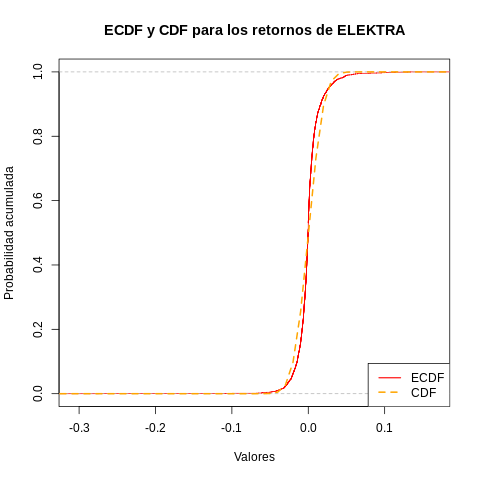

In [48]:
%%R
set.seed("991157")

# Calcule el ECDF usando los datos en WMreturn
edf_emreturn <- ecdf(EMreturn)

# Configurar la ventana
par(mfrow = c(1, 1))

# Gráfica de ECDF
plot(edf_emreturn, verticals = TRUE, do.p = FALSE, col = "red", main = "ECDF y CDF para los retornos de ELEKTRA",
     xlab = "Valores", ylab = "Probabilidad acumulada")

# Agregue la función de distribución acumulativa teórica (CDF) para la distribución normal
tt <- seq(from = -3, to = 3, by = 0.01)
lines(tt, pnorm(tt, mean(WMreturn), sd(WMreturn)), lty = 2, lwd = 2, col = "orange")

# Agregar etiquetas
legend("bottomright", c("ECDF", "CDF"), lty = c(1, 2),
       lwd = c(1.5, 2), col = c("red", "orange"))

Veamos ahora las gráficas usando *Python*

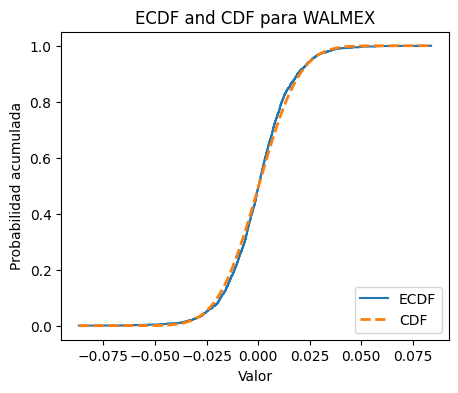

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(991156)
WMreturn = df_walmex['Return'].dropna().values

# Calcular ECDF
x = np.sort(WMreturn)
y = np.arange(1, len(x) + 1) / len(x)

# Graficar ECDF
plt.figure(figsize=(5, 4))
plt.step(x, y, where='post', label='ECDF', linewidth=1.5)

# Trazar la CDF teórica suponiendo una distribución normal
x_theoretical = np.linspace(min(WMreturn), max(WMreturn), 1000)
y_theoretical = norm.cdf(x_theoretical, np.mean(WMreturn), np.std(WMreturn))
plt.plot(x_theoretical, y_theoretical, '--', label='CDF', linewidth=2)

# Agregar una leyenda y etiquetas
plt.title('ECDF and CDF para WALMEX')
plt.xlabel('Valor')
plt.ylabel('Probabilidad acumulada')
plt.legend(loc='lower right')

# Muestra la gráfica
plt.show()

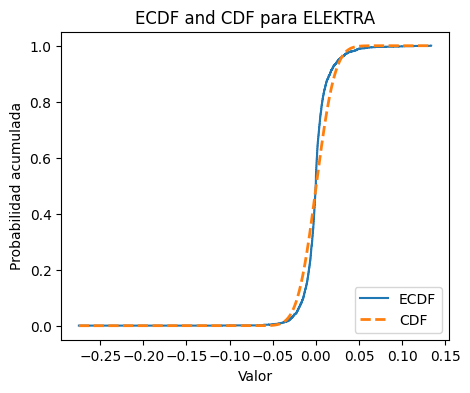

In [50]:
np.random.seed(991157)
EMreturn = df_elektra['Return'].dropna().values

# Calcular ECDF
x = np.sort(EMreturn)
y = np.arange(1, len(x) + 1) / len(x)

# Graficar ECDF
plt.figure(figsize=(5, 4))
plt.step(x, y, where='post', label='ECDF', linewidth=1.5)

# Trazar la CDF teórica suponiendo una distribución normal
x_theoretical = np.linspace(min(EMreturn), max(EMreturn), 1000)
y_theoretical = norm.cdf(x_theoretical, np.mean(EMreturn), np.std(EMreturn))
plt.plot(x_theoretical, y_theoretical, '--', label='CDF', linewidth=2)

# Agregar una leyenda y etiquetas
plt.title('ECDF and CDF para ELEKTRA')
plt.xlabel('Valor')
plt.ylabel('Probabilidad acumulada')
plt.legend(loc='lower right')

# Muestra la gráfica
plt.show()


### Estadísticas de orden

Las **estadísticas de orden** $Y_{(1)} , Y_{(2)},\ldots , Y_{(n)}$ son los valores $Y_1, \ldots ,Y_n$ ordenados de menor a mayor. Los subíndices de las estadísticas de orden están entre paréntesis para distinguirlas de la muestra desordenada. Por ejemplo, $Y_1$ es simplemente la primera observación en la muestra original, mientras que $Y_{(1)}$ *es la observación más pequeña en esa muestra*.



### Cuantiles, percentiles, cuartiles, quantiles y deciles

El **cuantil $q$ de una muestra**, cuyo valor está en el intervalo $(0,1)$, es $Y_{(k)}$, donde $k$ es $q_n$ redondeado a un número entero. Algunos autores redondean, otros redondean al número entero más cercano y otros interpolan.

* *quantile()* in *R* tiene nueve tipos 9 tipos diferentes de cuantiles muestrales, los tres utilizados por *SASTM*, *S-PLUSTM*, *SPSSTM* y *MinitabTM*, además de otros seis.
* El *q-ésimo cuantil* también se llama **percentil** *100q*.
* El cuantil de muestra de $0.5$ es el percentil $50$ y se llama **mediana**.
* Los cuantiles muestrales de $0.25$ y $0.75$ se denominan **primero** y **tercer cuartil**, y la mediana también se llama **segundo cuartil**.
* El $0.2$, $0.4$, $0.6$ y $0.8$ cuantiles son los **quintiles** ya que dividen los datos en cinco subconjuntos de igual tamaño y $0.1, 0.2, \ldots , 0.9$ cuantiles son los **deciles**.



A continuación podemos ilustrar estas deficiones generando 150 valores aleatorios a partir de una distribución normal estándar, es decir, con media cero y varianza 1.

[1] "Cuartiles:"
       25%        50%        75% 
-0.5365188  0.0156073  0.7287856 
[1] "Quintiles:"
       20%        40%        60%        80% 
-0.7569763 -0.2844848  0.2395289  0.8793581 
[1] "Deciles:"
       10%        20%        30%        40%        50%        60%        70% 
-1.1374713 -0.7569763 -0.4723847 -0.2844848  0.0156073  0.2395289  0.6446727 
       80%        90% 
 0.8793581  1.2579300 


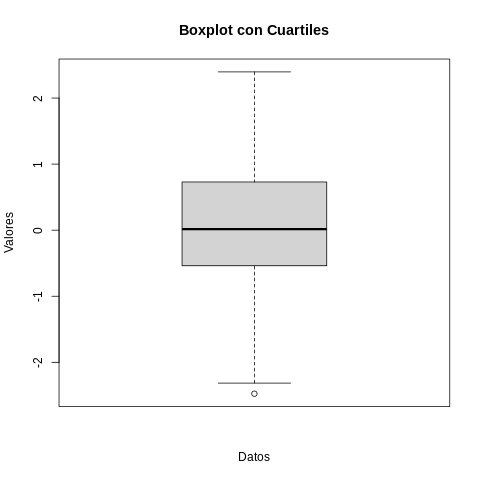

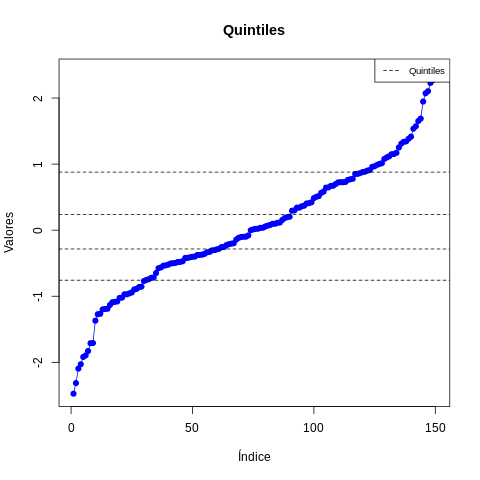

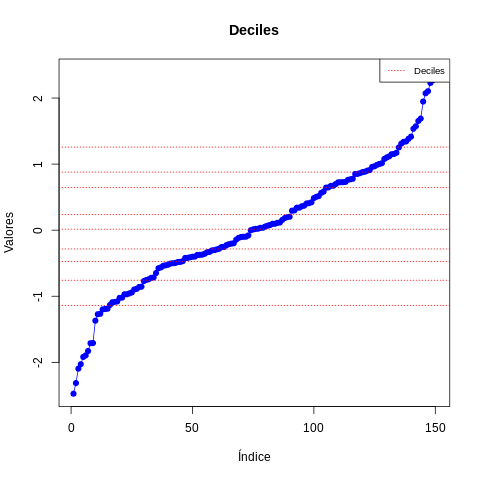

In [51]:
%%R
data <- rnorm(150)
# Cuartiles
cuartiles <- quantile(data, probs = c(0.25, 0.5, 0.75))
# Quintiles
quintiles <- quantile(data, probs = seq(0.2, 0.8, by = 0.2))
# Deciles
deciles <- quantile(data, probs = seq(0.1, 0.9, by = 0.1))

# Mostrar resultados
print("Cuartiles:")
print(cuartiles)
print("Quintiles:")
print(quintiles)
print("Deciles:")
print(deciles)

# Gráfico de Cuartiles usando Boxplot
boxplot(data, main = "Boxplot con Cuartiles", ylab = "Valores", xlab = "Datos")

# Gráfico de Quintiles y Deciles
plot(sort(data), type = "o", pch = 19, col = "blue", main = "Quintiles", xlab = "Índice", ylab = "Valores")
abline(h = quintiles, col = "black", lty = 2)  # Quintiles en negro
legend("topright", legend = c("Quintiles"), col = c("black"), lty = c(2), cex = 0.8)# Leyenda para Quintiles y Deciles

plot(sort(data), type = "o", pch = 19, col = "blue", main = "Deciles", xlab = "Índice", ylab = "Valores")
abline(h = deciles, col = "red", lty = 3)  # Deciles en rojo
legend("topright", legend = c("Deciles"), col = c("red"), lty = c(3), cex = 0.8)


Muchos estimadores se aproximan a una distribución normal si el tamaño de la muestra es suficientemente grande. Esto es particularmente verdadero para los cuantiles muestrales debido al **Teorema Central del Límite** (TCL) que afirma lo siguiente:



> Sea $Y_1,\ldots , Y_n$ una muestra aleatoria independiente e idénticamente distribuida con CDF $F$. Si $F$ tiene una densidad $f$ continua y positiva en $F^{-1}(q)$ para cada $q\in (0,1)$, entonces, para $n$ suficientemente grande, la distribución del $q$-ésimo cuantil muestral se aproxima a una distribución normal con una media igual al cuantil poblacional $F^{-1}(q)$ y varianza igual a
$$
\frac{q(1-q)}{n[f\{F^{-1}(q)\}]^2}
$$


Observemos que
* $f$ puede estimarse usando el estimador KDE
* $F^{-1}(q)$ puede estimarse mediante el $q$-ésimo cuantil muestral.
* Se puede construir un intervalo de confianza remuestreando.

Veamos ahora los cauntiles asociados a WALMEX

[1] "Cuartiles WALMEX:"
          25%           50%           75% 
-0.0089697811  0.0002681972  0.0092610193 
[1] "Quintiles WALMEX:"
         20%          40%          60%          80% 
-0.011449289 -0.003013952  0.003417025  0.011503066 
[1] "Deciles WALMEX:"
          10%           20%           30%           40%           50% 
-0.0181842673 -0.0114492892 -0.0065256941 -0.0030139519  0.0002681972 
          60%           70%           80%           90% 
 0.0034170252  0.0071219658  0.0115030664  0.0191123294 


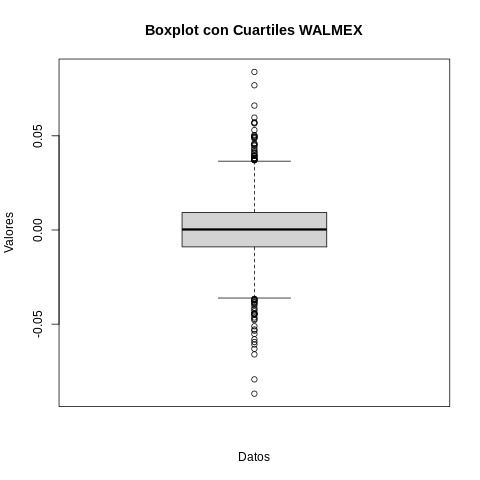

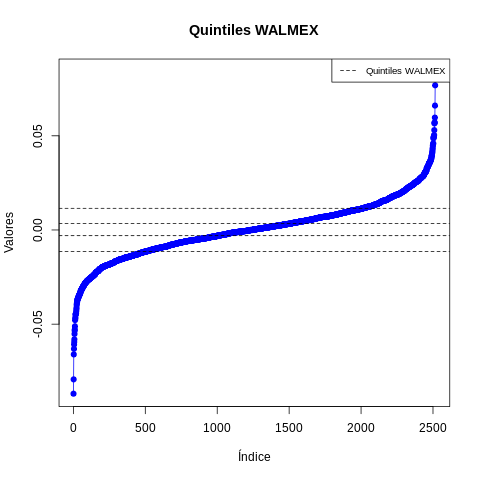

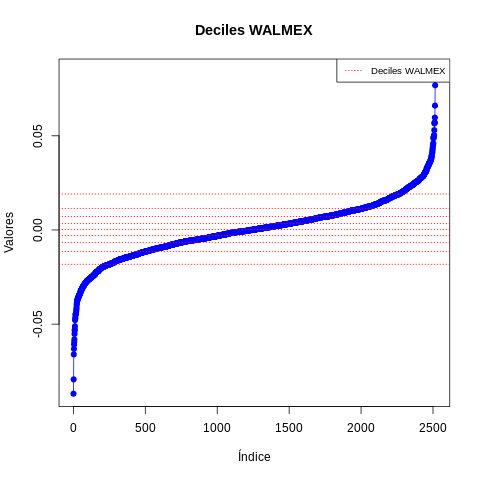

In [52]:
%%R
data <- WMreturn
# Cuartiles
cuartiles <- quantile(data, probs = c(0.25, 0.5, 0.75))
# Quintiles
quintiles <- quantile(data, probs = seq(0.2, 0.8, by = 0.2))
# Deciles
deciles <- quantile(data, probs = seq(0.1, 0.9, by = 0.1))

# Mostrar resultados
print("Cuartiles WALMEX:")
print(cuartiles)
print("Quintiles WALMEX:")
print(quintiles)
print("Deciles WALMEX:")
print(deciles)

# Gráfico de Cuartiles usando Boxplot
boxplot(data, main = "Boxplot con Cuartiles WALMEX", ylab = "Valores", xlab = "Datos")

# Gráfico de Quintiles y Deciles
plot(sort(data), type = "o", pch = 19, col = "blue", main = "Quintiles WALMEX", xlab = "Índice", ylab = "Valores")
abline(h = quintiles, col = "black", lty = 2)  # Quintiles en negro
legend("topright", legend = c("Quintiles WALMEX"), col = c("black"), lty = c(2), cex = 0.8)# Leyenda para Quintiles y Deciles

plot(sort(data), type = "o", pch = 19, col = "blue", main = "Deciles WALMEX", xlab = "Índice", ylab = "Valores")
abline(h = deciles, col = "red", lty = 3)  # Deciles en rojo
legend("topright", legend = c("Deciles WALMEX"), col = c("red"), lty = c(3), cex = 0.8)

Mostremos los cuantiles asociados a ELEKTRA

[1] "Cuartiles ELEKTRA:"
          25%           50%           75% 
-0.0059989020 -0.0001859805  0.0052468604 
[1] "Quintiles ELEKTRA:"
         20%          40%          60%          80% 
-0.008046094 -0.001979184  0.001142166  0.007401237 
[1] "Deciles ELEKTRA:"
          10%           20%           30%           40%           50% 
-0.0145743044 -0.0080460936 -0.0043785192 -0.0019791843 -0.0001859805 
          60%           70%           80%           90% 
 0.0011421658  0.0036789859  0.0074012366  0.0164057901 


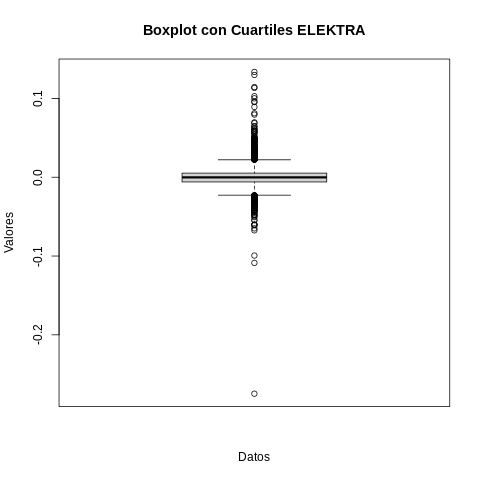

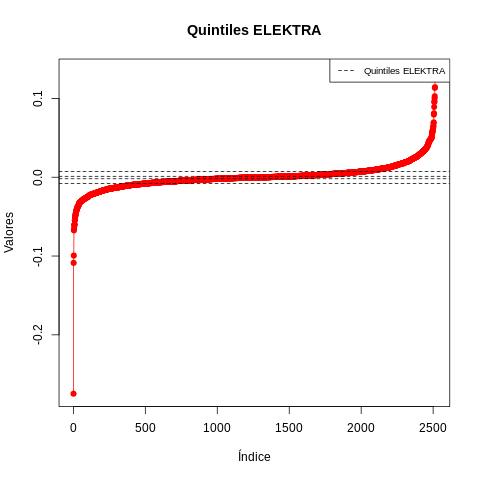

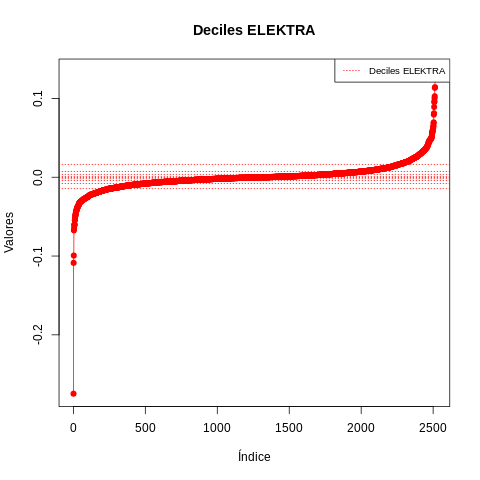

In [53]:
%%R
data <- EMreturn
# Cuartiles
cuartiles <- quantile(data, probs = c(0.25, 0.5, 0.75))
# Quintiles
quintiles <- quantile(data, probs = seq(0.2, 0.8, by = 0.2))
# Deciles
deciles <- quantile(data, probs = seq(0.1, 0.9, by = 0.1))

# Mostrar resultados
print("Cuartiles ELEKTRA:")
print(cuartiles)
print("Quintiles ELEKTRA:")
print(quintiles)
print("Deciles ELEKTRA:")
print(deciles)

# Gráfico de Cuartiles usando Boxplot
boxplot(data, main = "Boxplot con Cuartiles ELEKTRA", ylab = "Valores", xlab = "Datos")

# Gráfico de Quintiles y Deciles
plot(sort(data), type = "o", pch = 19, col = "red", main = "Quintiles ELEKTRA", xlab = "Índice", ylab = "Valores")
abline(h = quintiles, col = "black", lty = 2)  # Quintiles en negro
legend("topright", legend = c("Quintiles ELEKTRA"), col = c("black"), lty = c(2), cex = 0.8)# Leyenda para Quintiles y Deciles

plot(sort(data), type = "o", pch = 19, col = "red", main = "Deciles ELEKTRA", xlab = "Índice", ylab = "Valores")
abline(h = deciles, col = "red", lty = 3)  # Deciles en rojo
legend("topright", legend = c("Deciles ELEKTRA"), col = c("red"), lty = c(3), cex = 0.8)

### Gráficas de probabilidad normal

Muchos modelos estadísticos suponen que una muestra aleatoria proviene de una distribución normal. Por lo tanto, usar las gráficas de una distribución normal nos permite observar que tanto difieren los datos de la distribución normal y con ello tenemos un criterio para decidir si la muestra proviene o no de una normal.

Cuando se cumple la normalidad tenemos que el $q$-ésimo cuantil es aproximadamente igual a $\mu+\sigma \Phi^{-1}(q)$, que es el cuantil poblacional. Esto implica que, excepto por la variación muestral, la gŕafica del cuantil muestral versus $\Phi^{-1}$ será lineal y por lo tanto, la desviación de una línea recta es evidencia de que no se cumple la normalidad.

Las gráficas de probabilidad normal son conocidas como gŕaficas $Q-Q$.

Un gráfico de la probabilidad normal consiste en graficar $Y_{(i)}$ contra $\Phi^{-1}(\{(i-1/2)/n\})$, en donde $Y_{(i)}$ y $(i-1/2)/n$ corresponden a los cuantiles muestrales y poblaciones respectivamente.

Observemos que restar $1/2$ nos permite evitar que $\Phi^{-1}(1)=\infty$ cuando $i=n$.

También hay otras versiones de gráficas normales, por ejemplo, la gráfica de estadísticas de orden versus sus valores esperados bajo normalidad, pero para muestras grandes están serán similares, excepto quizá en los extremos de sus colas.

Cuando la gŕafica no es lineal obtenemos curvas que podemos clasificar de acuerdo con el comportamieto que tiene la pendiente de la línea tangente en dos tipos básicamente:
* **Convexa**: Si la pendiente de la línea tangente se incrementa cuando nos movemos de izquieda a derecha
* **Cóncava**: Si la pendiente de la línea tangente se decrementa cuando nos movemos de izquierda a derecha.

Estos tipos dan lugar a otros dos tipos de clasificación

* **Convexa-Cóncava**: Si la pendiente de la línea tangente se incrementa y después disminuye
* **Cóncava-Convexa**: Si la pendiente de la línea tangente disminuye y después se incrementa


A continuación ilustramos estos conceptos usando *R*

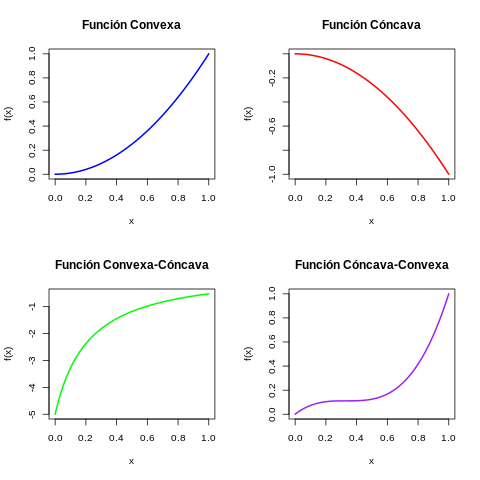

In [54]:
%%R
# Cargar la librería necesaria
library(ggplot2)

# Definir las funciones
f_convexa <- function(x){x^2}
f_concava <- function(x){-x^2}
f_convexa_concava <- function(x){1/(0.8-exp(x))}
f_concava_convexa <- function(x){1*x-3*x^2+3*x^3}

# Crear un rango de valores x
x <- seq(0, 1, length.out = 100)

# Crear los gráficos
y_convexa <- f_convexa(x)
y_concava <- f_concava(x)
y_convexa_concava <- f_convexa_concava(x)
y_concava_convexa <- f_concava_convexa(x)

# Configurar la disposición de gráficos 2x2
par(mfrow = c(2, 2))

# Graficar la función convexa
plot(x, y_convexa, type = 'l', col = 'blue', lwd = 2,
     main = "Función Convexa",
     xlab = "x", ylab = "f(x)")

# Graficar la función cóncava
plot(x, y_concava, type = 'l', col = 'red', lwd = 2,
     main = "Función Cóncava",
     xlab = "x", ylab = "f(x)")

# Graficar la función convexa-cóncava
plot(x, y_convexa_concava, type = 'l', col = 'green', lwd = 2,
     main = "Función Convexa-Cóncava",
     xlab = "x", ylab = "f(x)")

# Graficar la función cóncava-convexa
plot(x, y_concava_convexa, type = 'l', col = 'purple', lwd = 2,
     main = "Función Cóncava-Convexa",
     xlab = "x", ylab = "f(x)")

### Gráficas Q-Q en *R* con *qqnorm*

La función *qqnorm* genera un gráfico Q-Q que compara los cuantiles de nuestros datos (sample quantiles) con los cuantiles teóricos (theoretical quantiles) de la distribución normal estándar, $N(0, 1)$.

Observemos que la función *qqnorm()* permite elegir el eje donde se colocan los datos:
* *datax = TRUE* coloca los datos en el eje-$x$
* *datax = FALSE* coloca los datos en el eje-$y$




En los siguientes ejemplos podemos observar las gráficas normales de muestras de tamaño 20, 150 y 1000. Para muestras pequeñas es razonable observar una desviación de la línea recta esperada, en cambio, cuando tenemos muestras grandes las desviaciones sólo se presentan en los extremos de las colas y donde hay más variación.

Mediante la función *qqline()* de *R* agregamos uba línea recta a la gráfica normal para determinar visualmente el grado de linealidad que tienen nuestros datos.

Otras posibilidades serían un ajuste de *mínimos cuadrados* para todos los cuantiles o, para evitar la influencia de valores atípicos, algún subconjunto de los cuantiles, por ejemplo, todos entre los cuantiles $0.1$ y $0.9$.

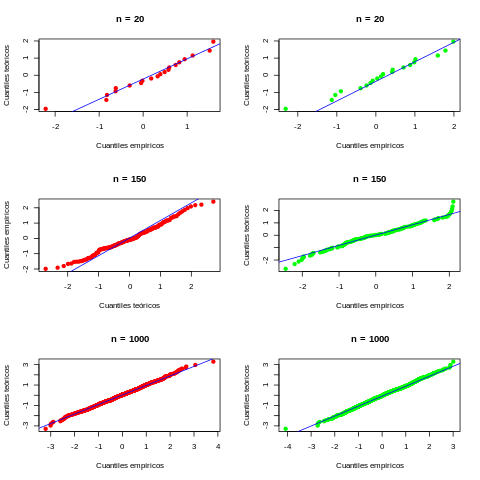

In [55]:
%%R
set.seed("1")
# Generar datos lognormales con media 0 y desviación estándar 1
data20 <- rnorm(20)
data150 <- rnorm(150)
data1000 <- rnorm(1000)

# Generar datos lognormales con media 0 y desviación estándar 1
set.seed("2")
data20b <- rnorm(20)
data150b <- rnorm(150)
data1000b <- rnorm(1000)

par(mfrow = c(3, 2))

# Crear gráficos Q-Q
qqnorm(data20, datax = TRUE, main = "n = 20", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "red")
qqline(data20, datax = TRUE, col = "blue", lty = 1)

qqnorm(data20b, datax = TRUE, main = "n = 20", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "green")
qqline(data20b, datax = TRUE, col = "blue", lty = 1)

qqnorm(data150, datax=FALSE, main = "n = 150", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "red")
qqline(data150, datax = TRUE, col = "blue", lty = 1)

qqnorm(data150b, datax = TRUE, main = "n = 150", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "green")
qqline(data150b, datax = TRUE, col = "blue", lty = 1)

qqnorm(data1000, datax = TRUE, main = "n = 1000", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "red")
qqline(data1000, datax = TRUE, col = "blue", lty = 1)

qqnorm(data1000b, datax = TRUE, main = "n = 1000", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "green")
qqline(data1000b, datax = TRUE, col = "blue", lty = 1)


Las formas cóncavas de las siguientes gráficas que corresponden a distribuciones *lognorm* indican asimetría hacia la derecha. Observemos que:

* La asimetría cuando $\sigma = 1$ es bastante fuerte
* Cuando $\sigma = 1/2$, la asimetría sigue siendo muy notable.
* Con $\sigma$ reducido a $1/5$, la asimetría derecha es mucho menos pronunciada y podría no ser discernible con tamaños de muestra más pequeños.

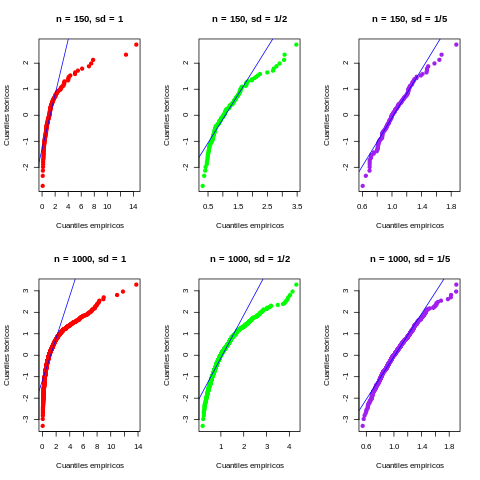

In [56]:
%%R
set.seed("1000")
# Generar datos lognormales con media 0 y desviación estándar 1
data150_1 <- rlnorm(150, meanlog = 0, sdlog = 1)
data1000_1 <- rlnorm(1000, meanlog = 0, sdlog = 1)

# Generar datos lognormales con media 0 y desviación estándar 1/2
data150_0_5 <- rlnorm(150, meanlog = 0, sdlog = 0.5)
data1000_0_5 <- rlnorm(1000, meanlog = 0, sdlog = 0.5)

# Generar datos lognormales con media 0 y desviación estándar 175
data150_0_2 <- rlnorm(150, meanlog = 0, sdlog = 0.20)
data1000_0_2 <- rlnorm(1000, meanlog = 0, sdlog = 0.20)

set.seed("2000")
# Generar datos lognormales con media 0 y desviación estándar 1
data150b_1 <- rlnorm(150, meanlog = 0, sdlog = 1)
data1000b_1 <- rlnorm(1000, meanlog = 0, sdlog = 1)

# Generar datos lognormales con media 0 y desviación estándar 1/2
data150b_0_5 <- rlnorm(150, meanlog = 0, sdlog = 0.5)
data1000b_0_5 <- rlnorm(1000, meanlog = 0, sdlog = 0.5)

# Generar datos lognormales con media 0 y desviación estándar 175
data150b_0_2 <- rlnorm(150, meanlog = 0, sdlog = 0.20)
data1000b_0_2 <- rlnorm(1000, meanlog = 0, sdlog = 0.20)

par(mfrow = c(2, 3))

# Crear gráficos Q-Q
qqnorm(data150_1, datax = TRUE, main = "n = 150, sd = 1", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "red")
qqline(data150_1, datax = TRUE, col = "blue", lty = 1)

qqnorm(data150_0_5, datax = TRUE, main = "n = 150, sd = 1/2", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "green")
qqline(data150_0_5, datax = TRUE, col = "blue", lty = 1)

qqnorm(data150_0_2, datax = TRUE, main = "n = 150, sd = 1/5", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "purple")
qqline(data150_0_2, datax = TRUE, col = "blue", lty = 1)

qqnorm(data1000_1, datax = TRUE, main = "n = 1000, sd = 1", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "red")
qqline(data1000_1, datax = TRUE, col = "blue", lty = 1)

qqnorm(data1000_0_5, datax = TRUE, main = "n = 1000, sd = 1/2", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "green")
qqline(data1000_0_5, datax = TRUE, col = "blue", lty = 1)

qqnorm(data1000_0_2, datax = TRUE, main = "n = 1000, sd = 1/5", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "purple")
qqline(data1000_0_2, datax = TRUE, col = "blue", lty = 1)

Las siguientes figuras corresponden a muestras de tamaño $150$ de la distribución $t$-student con 4, 10 y 30 grados de libertad. Observemos que  

* Las gráficas con 4 grados de libertad tienen colas más pesadas, es decir, son propensas a valores atípicos.
* Las colas son más pesadas en la muestra con 4 grados de libertad en comparación con la muestra con 10 grados de libertad, y las colas de la distribución con 30 grados de libertad no son muy diferentes de las colas de una distribución normal.
* Es una propiedad general de la distribución $t$ que las colas se vuelven más pesadas a medida que el parámetro de grados de libertad disminuye y la distribución se aproxima a la distribución normal a medida que los grados de libertad se acercan al infinito.
* Ninguna de las muestras es asimétrica porque la distribución $t$ es simétrica.
* Las distribuciones de cola pesada con poca o ninguna asimetría son comunes en las finanzas por lo que la distribución $t$ es un modelo razonable para los rendimientos de las acciones y otros datos de los mercados financieros.

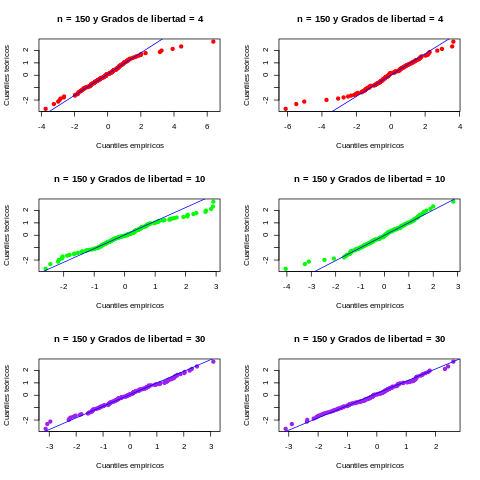

In [57]:
%%R
# Generar datos t-student con 150 datos y 4, 10 y 30 grados de libertad
set.seed(1000)
data150_4 <- rt(150, df = 4)
data150_10 <- rt(150, df = 10)
data150_30 <- rt(150, df = 30)

set.seed(2000)
data150_4b <- rt(150, df = 4)
data150_10b <- rt(150, df = 10)
data150_30b <- rt(150, df = 30)

# Crear gráficos Q-Q
par(mfrow = c(3,2))

qqnorm(data150_4, datax = TRUE, main = "n = 150 y Grados de libertad = 4", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "red")
qqline(data150_4, datax = TRUE, col = "blue", lty = 1)
qqnorm(data150_4b, datax = TRUE, main = "n = 150 y Grados de libertad = 4", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "red")
qqline(data150_4b, datax = TRUE, col = "blue", lty = 1)

qqnorm(data150_10, datax = TRUE, main = "n = 150 y Grados de libertad = 10", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "green")
qqline(data150_10, datax = TRUE, col = "blue", lty = 1)
qqnorm(data150_10b, datax = TRUE, main = "n = 150 y Grados de libertad = 10", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "green")
qqline(data150_10b, datax = TRUE, col = "blue", lty = 1)

qqnorm(data150_30, datax = TRUE, main = "n = 150 y Grados de libertad = 30", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "purple")
qqline(data150_30, datax = TRUE, col = "blue", lty = 1)
qqnorm(data150_30b, datax = TRUE, main = "n = 150 y Grados de libertad = 30", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "purple")
qqline(data150_30b, datax = TRUE, col = "blue", lty = 1)

Veamos ahora las gráficas Q-Q normales correspondiente a WALMEX y ELEKTRA usando *R*

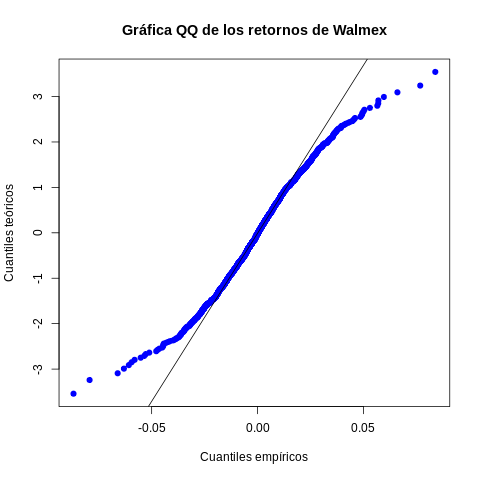

In [58]:
%%R
# Crear gráficos Q-Q
qqnorm(WMreturn, datax = TRUE, main = "Gráfica QQ de los retornos de Walmex", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "blue")
qqline(WMreturn, datax = TRUE, col = "black", lty = 1)

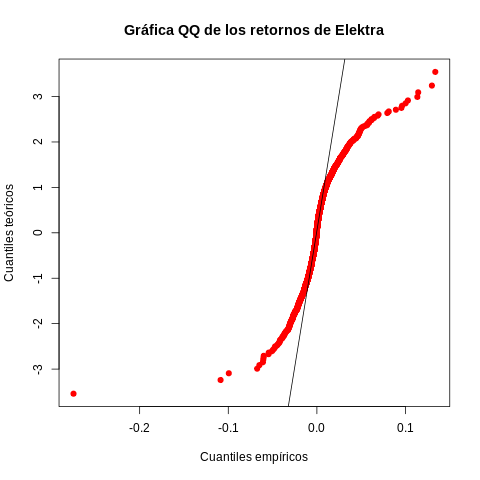

In [59]:
%%R
# Crear gráficos Q-Q
qqnorm(EMreturn, datax = TRUE, main = "Gráfica QQ de los retornos de Elektra", xlab = "Cuantiles teóricos", ylab = "Cuantiles empíricos", pch = 19, col = "red")
qqline(EMreturn, datax = TRUE, col = "black", lty = 1)

### Gráficas Q-Q en *Python* con *probplot*

Construyamos las gráficas anteriores en *Python*. Para ello, primero importemos el módulo *stats* de la biblioteca *SciPy* que proporciona funciones y herramientas estadísticas y de análisis numérico.

En los siguientes ejemplos podemos observar las gráficas normales de muestras de tamaño 20, 150 y 1000.

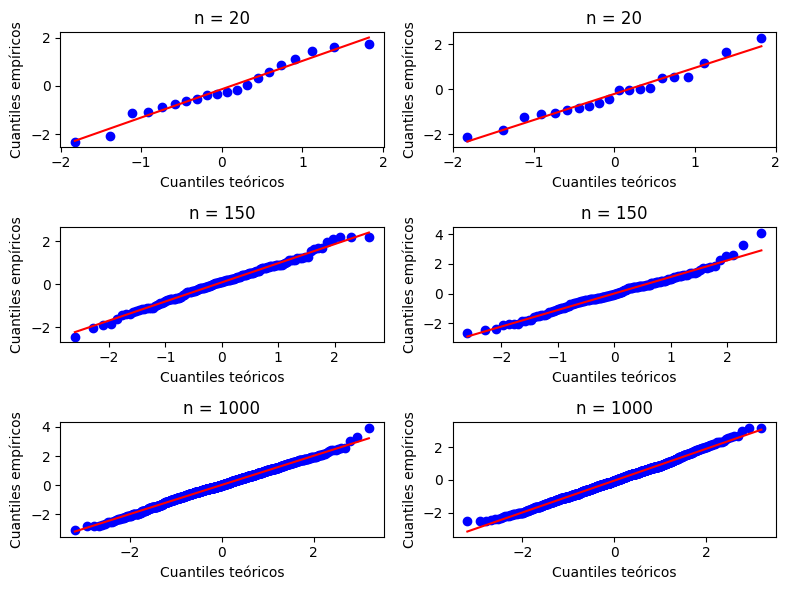

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generar datos normales con media 0 y desviación estándar 1
np.random.seed(1)
data20 = np.random.normal(0, 1, 20)
data150 = np.random.normal(0, 1, 150)
data1000 = np.random.normal(0, 1, 1000)

# Generar datos normales con media 0 y desviación estándar 1
np.random.seed(2)
data20b = np.random.normal(0, 1, 20)
data150b = np.random.normal(0, 1, 150)
data1000b = np.random.normal(0, 1, 1000)

# Crear gráficos Q-Q
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

stats.probplot(data20, plot=axs[0, 0])
axs[0, 0].set_title("n = 20")
axs[0, 0].set_xlabel("Cuantiles teóricos")
axs[0, 0].set_ylabel("Cuantiles empíricos")

stats.probplot(data20b, plot=axs[0, 1])
axs[0, 1].set_title("n = 20")
axs[0, 1].set_xlabel("Cuantiles teóricos")
axs[0, 1].set_ylabel("Cuantiles empíricos")

stats.probplot(data150, plot=axs[1, 0])
axs[1, 0].set_title("n = 150")
axs[1, 0].set_xlabel("Cuantiles teóricos")
axs[1, 0].set_ylabel("Cuantiles empíricos")

stats.probplot(data150b, plot=axs[1, 1])
axs[1, 1].set_title("n = 150")
axs[1, 1].set_xlabel("Cuantiles teóricos")
axs[1, 1].set_ylabel("Cuantiles empíricos")

stats.probplot(data1000, plot=axs[2, 0])
axs[2, 0].set_title("n = 1000")
axs[2, 0].set_xlabel("Cuantiles teóricos")
axs[2, 0].set_ylabel("Cuantiles empíricos")

stats.probplot(data1000b, plot=axs[2, 1])
axs[2, 1].set_title("n = 1000")
axs[2, 1].set_xlabel("Cuantiles teóricos")
axs[2, 1].set_ylabel("Cuantiles empíricos")

plt.tight_layout()
plt.show()

Las siguientes gráficas corresponden a distribuciones lognorm

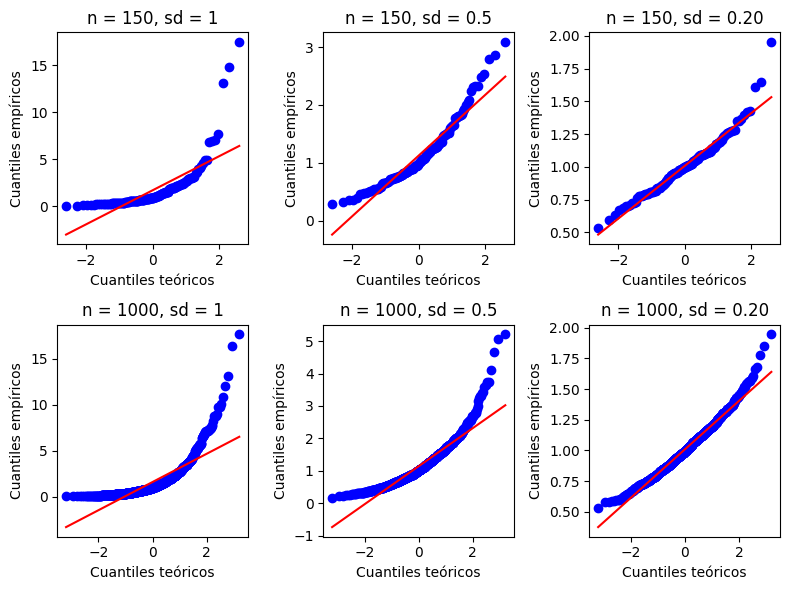

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generar datos lognormales con media 0 y desviación estándar 1
np.random.seed(1000)
data150_1 = np.random.lognormal(mean=0, sigma=1, size=150)
data1000_1 = np.random.lognormal(mean=0, sigma=1, size=1000)

# Generar datos lognormales con media 0 y desviación estándar 1/2
data150_0_5 = np.random.lognormal(mean=0, sigma=0.5, size=150)
data1000_0_5 = np.random.lognormal(mean=0, sigma=0.5, size=1000)

# Generar datos lognormales con media 0 y desviación estándar 1/5
data150_0_2 = np.random.lognormal(mean=0, sigma=0.20, size=150)
data1000_0_2 = np.random.lognormal(mean=0, sigma=0.20, size=1000)

# Generar datos lognormales con media 0 y desviación estándar 1
np.random.seed(2000)
data150b_1 = np.random.lognormal(mean=0, sigma=1, size=150)
data1000b_1 = np.random.lognormal(mean=0, sigma=1, size=1000)

# Generar datos lognormales con media 0 y desviación estándar 1/2
data150b_0_5 = np.random.lognormal(mean=0, sigma=0.5, size=150)
data1000b_0_5 = np.random.lognormal(mean=0, sigma=0.5, size=1000)

# Generar datos lognormales con media 0 y desviación estándar 1/5
data150b_0_2 = np.random.lognormal(mean=0, sigma=0.20, size=150)
data1000b_0_2 = np.random.lognormal(mean=0, sigma=0.20, size=1000)

# Crear gráficos Q-Q
fig, axs = plt.subplots(2, 3, figsize=(8,6))

stats.probplot(data150_1, plot=axs[0, 0])
axs[0, 0].set_title("n = 150, sd = 1")
axs[0, 0].set_xlabel("Cuantiles teóricos")
axs[0, 0].set_ylabel("Cuantiles empíricos")

stats.probplot(data150_0_5, plot=axs[0, 1])
axs[0, 1].set_title("n = 150, sd = 0.5")
axs[0, 1].set_xlabel("Cuantiles teóricos")
axs[0, 1].set_ylabel("Cuantiles empíricos")

stats.probplot(data150_0_2, plot=axs[0, 2])
axs[0, 2].set_title("n = 150, sd = 0.20")
axs[0, 2].set_xlabel("Cuantiles teóricos")
axs[0, 2].set_ylabel("Cuantiles empíricos")

stats.probplot(data1000_1, plot=axs[1, 0])
axs[1, 0].set_title("n = 1000, sd = 1")
axs[1, 0].set_xlabel("Cuantiles teóricos")
axs[1, 0].set_ylabel("Cuantiles empíricos")

stats.probplot(data1000_0_5, plot=axs[1, 1])
axs[1, 1].set_title("n = 1000, sd = 0.5")
axs[1, 1].set_xlabel("Cuantiles teóricos")
axs[1, 1].set_ylabel("Cuantiles empíricos")

stats.probplot(data1000_0_2, plot=axs[1, 2])
axs[1, 2].set_title("n = 1000, sd = 0.20")
axs[1, 2].set_xlabel("Cuantiles teóricos")
axs[1, 2].set_ylabel("Cuantiles empíricos")

plt.tight_layout()
plt.show()

Las siguientes figuras corresponden a muestras de taaño  150  de la distribución  𝑡 -student con 4, 10 y 30 grados de libertad

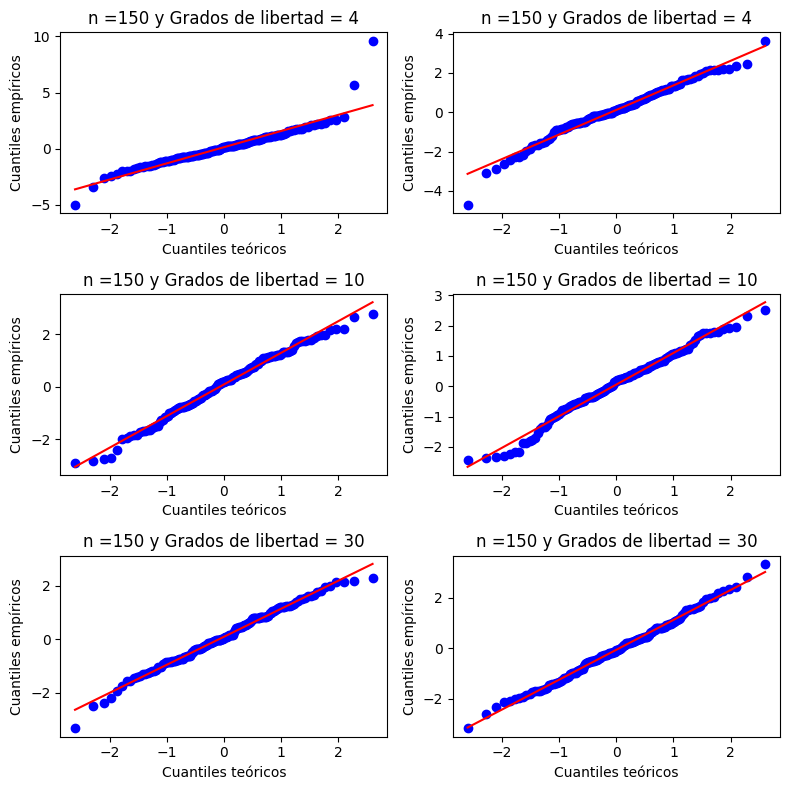

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generar datos t-student con 150 datos y 4, 10 y 30 grados de libertad
np.random.seed(1000)
data150_4 = np.random.standard_t(df=4, size=150)
data150_10 = np.random.standard_t(df=10, size=150)
data150_30 = np.random.standard_t(df=30, size=150)
np.random.seed(2000)
data150_4b = np.random.standard_t(df=4, size=150)
data150_10b = np.random.standard_t(df=10, size=150)
data150_30b = np.random.standard_t(df=30, size=150)

# Crear gráficos Q-Q
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

stats.probplot(data150_4, plot=axs[0,0])
axs[0,0].set_title("n =150 y Grados de libertad = 4")
axs[0,0].set_xlabel("Cuantiles teóricos")
axs[0,0].set_ylabel("Cuantiles empíricos")

stats.probplot(data150_4b, plot=axs[0,1])
axs[0,1].set_title("n =150 y Grados de libertad = 4")
axs[0,1].set_xlabel("Cuantiles teóricos")
axs[0,1].set_ylabel("Cuantiles empíricos")

stats.probplot(data150_10, plot=axs[1,0])
axs[1,0].set_title("n =150 y Grados de libertad = 10")
axs[1,0].set_xlabel("Cuantiles teóricos")
axs[1,0].set_ylabel("Cuantiles empíricos")

stats.probplot(data150_10b, plot=axs[1,1])
axs[1,1].set_title("n =150 y Grados de libertad = 10")
axs[1,1].set_xlabel("Cuantiles teóricos")
axs[1,1].set_ylabel("Cuantiles empíricos")

stats.probplot(data150_30, plot=axs[2,0])
axs[2,0].set_title("n =150 y Grados de libertad = 30")
axs[2,0].set_xlabel("Cuantiles teóricos")
axs[2,0].set_ylabel("Cuantiles empíricos")

stats.probplot(data150_30b, plot=axs[2,1])
axs[2,1].set_title("n =150 y Grados de libertad = 30")
axs[2,1].set_xlabel("Cuantiles teóricos")
axs[2,1].set_ylabel("Cuantiles empíricos")

plt.tight_layout()
plt.show()

Veamos ahora las gráficas Q-Q en *Pyhton*

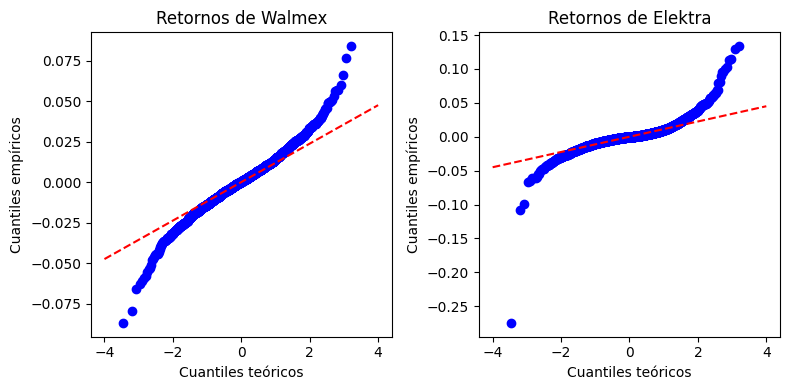

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Crear gráficos Q-Q
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

stats.probplot(df_walmex['Return'], plot=axs[0])
axs[0].set_title("Retornos de Walmex")
axs[0].set_xlabel("Cuantiles teóricos")
axs[0].set_ylabel("Cuantiles empíricos")
axs[0].plot([-4, 4], [-0.0475, 0.0475], 'r--')  # Agregar línea roja

stats.probplot(df_elektra['Return'], plot=axs[1])
axs[1].set_title("Retornos de Elektra")
axs[1].set_xlabel("Cuantiles teóricos")
axs[1].set_ylabel("Cuantiles empíricos")
axs[1].plot([-4, 4], [-0.045, 0.045], 'r--')  # Agregar línea roja

plt.tight_layout()
plt.show()

A veces, una gráfica normal no tendrá ninguno de los patrones analizados aquí, sino que tendrá un comportamiento más complejo. Por ejemplo, en la siguiente imagen, la alternancia del gráfico Q-Q entre concavidad y convexidad indica un comportamiento complejo que revela la trimodalidad. La multimodalidad es algo rara en la práctica y a menudo indica una mezcla de varios grupos distintos de datos.



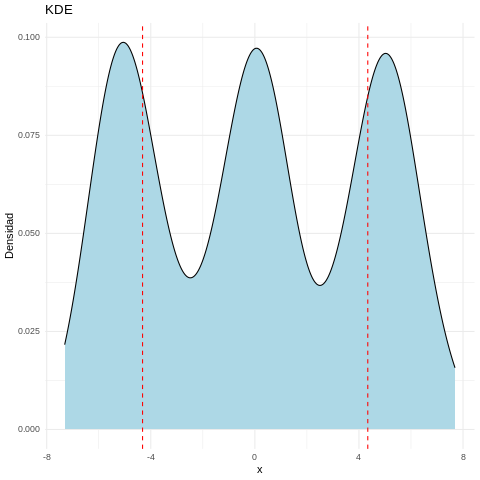

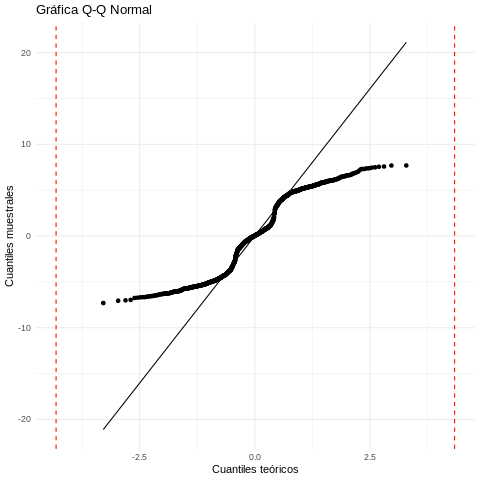

In [64]:
%%R
# Librerías necesarias
library(ggplot2)

# Simular una muestra de una distribución trimodal
set.seed(123)
n <- 1000
x <- c(rnorm(n/3, mean = -5, sd = 1),  # Primer modo
       rnorm(n/3, mean = 0, sd = 1),   # Segundo modo
       rnorm(n/3, mean = 5, sd = 1))   # Tercer modo

# Cuartiles de la muestra
q1 <- quantile(x, 0.25)
q3 <- quantile(x, 0.75)

# Crear la primera gráfica: Estimación de densidad de kernel
p1 <- ggplot(data.frame(x = x), aes(x = x)) +
  geom_density(fill = "lightblue") +
  geom_vline(xintercept = c(q1, q3), linetype = "dashed", color = "red") +
  labs(title = "KDE", x = "x", y = "Densidad") +
  theme_minimal()

# Crear la segunda gráfica: Gráfico Q-Q
p2 <- ggplot(data.frame(sample = x), aes(sample = sample)) +
  stat_qq() +
  stat_qq_line() +
  geom_vline(xintercept = c(q1, q3), linetype = "dashed", color = "red") +
  labs(title = "Gráfica Q-Q Normal", x = "Cuantiles teóricos", y = "Cuantiles muestrales") +
  theme_minimal()

# Mostrar los dos gráficos lado a lado utilizando la disposición de gráficos base
# Configurar una disposición de 1 fila y 2 columnas
par(mfrow = c(2, 2))

# Mostrar el gráfico de densidad
print(p1)

# Mostrar el gráfico Q-Q
print(p2)

# Restaurar la disposición original de gráficos
par(mfrow = c(2, 2))


Ahora en *Python*

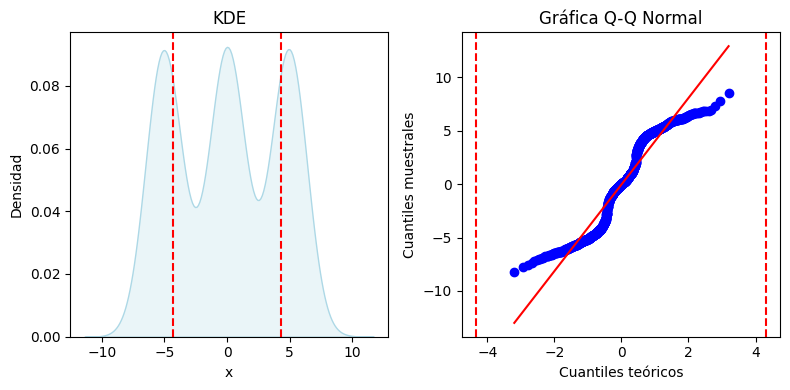

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Simular una muestra de una distribución trimodal
np.random.seed(123)
n = 1000
x = np.concatenate([np.random.normal(-5, 1, n//3),  # Primer modo
                    np.random.normal(0, 1, n//3),   # Segundo modo
                    np.random.normal(5, 1, n//3)])  # Tercer modo

# Calcular cuartiles
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)

# Crear una figura con dos subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Estimación de densidad de kernel (KDE)
sns.kdeplot(x, fill=True, color="lightblue", ax=axes[0])
axes[0].axvline(q1, color='red', linestyle='--')
axes[0].axvline(q3, color='red', linestyle='--')
axes[0].set_title('KDE')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Densidad')

# Gráfico Q-Q
stats.probplot(x, dist="norm", plot=axes[1])
axes[1].axvline(q1, color='red', linestyle='--')
axes[1].axvline(q3, color='red', linestyle='--')
axes[1].set_title('Gráfica Q-Q Normal')
axes[1].set_xlabel('Cuantiles teóricos')
axes[1].set_ylabel('Cuantiles muestrales')

# Ajustar los márgenes
plt.tight_layout()

# Mostrar los gráficos
plt.show()


A menudo es bastante difícil decidir si una gráfica normal es lo suficientemente cercana a una linea como para concluir que los datos están distribuidos normalmente, especialmente cuando el tamaño de la muestra es pequeño.

Es muy díficil saber si los datos provienen de una distribución normal, a menos que se tenga mucha experiencia con gráficos normales. Por ello, una prueba de normalidad resulta muy útil en estos casos.

### Gráficas seminormales

El **gráfico seminormal** es una variación del gráfico normal que se utiliza para detectar datos atípicos en lugar de comprobar una distribución normal.
Una gráfica seminormal es un método gráfico que se utiliza particularmente cuando se trata de valores absolutos de puntos de datos. Traza los valores de datos absolutos ordenados frente a los valores esperados de una distribución seminormal.

Si los puntos se encuentran cerca de la línea de referencia en el gráfico, se puede considerar que los datos siguen una distribución seminormal.
Las desviaciones de la línea indican desviaciones de esta distribución, lo que podría sugerir no normalidad o la presencia de valores atípicos.







Un gráfico seminormal es un diagrama de dispersión de las estadísticas de orden de los valores absolutos de los datos frente a $Φ^{−1}{(n + i)/(2n + 1)}$, $i = 1,\ldots , n$, donde $n$ es el tamaño de la muestra. La función **halfnorm()** en el paquete **faraway** de *R* crea un gráfico seminormal y etiqueta las observaciones más alejadas (**nlab**), donde *nlab* es un argumento de esta función con un valor predeterminado de 2.

In [ ]:
%%R
install.packages("faraway")
library(faraway)
library(MASS)

En la siguiente gráfica de *R* se muestran las diferencias entre valores consecutivos de la serie temporal "dm" (Deutschmark/USD exchange rate) con el fin de analizar las variaciones en la tasa de cambio.

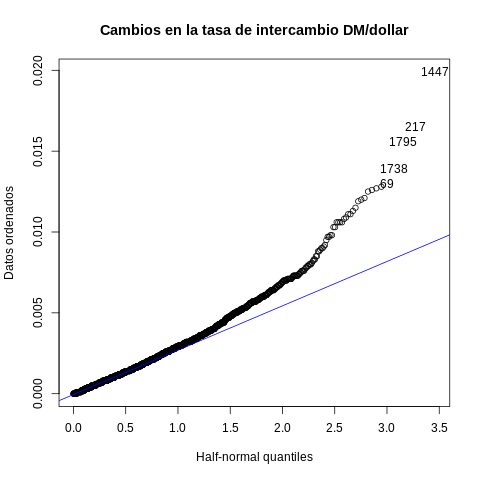

In [67]:
%%R
# Cargar el conjunto de datos de Garch
data("Garch", package = "Ecdat")

# Calcular diferencias en los datos del marco alemán.
diffdm <- diff(Garch[, "dm"])  # Suponiendo que 'dm' es el nombre de la columna para el marco alemán

# Crea una gráfica seminormal de las diferencias absolutas.
halfnorm(abs(diffdm), nlab = 5, main = "Cambios en la tasa de intercambio DM/dollar", ylab = "Datos ordenados")
qqline(diffdm, col = "blue", lty = 1)

A continuación vemos la gráfica de Walmart con 5 datos atípicos

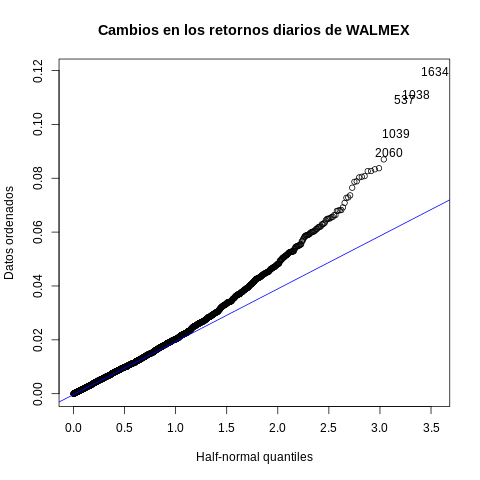

In [68]:
%%R
diffwm <- diff(WMreturn)

# Crea una gráfica seminormal de las diferencias absolutas.
halfnorm(abs(diffwm), nlab = 5, main = "Cambios en los retornos diarios de WALMEX", ylab = "Datos ordenados")
qqline(diffwm, col = "blue", lty = 1)

y la gráfica de Elektra con 5 datos atípicos

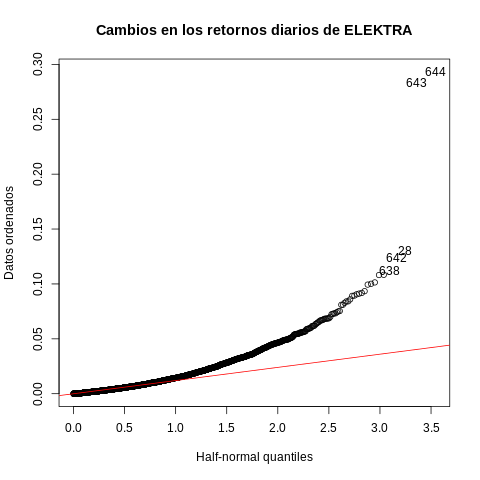

In [69]:
%%R
diffem <- diff(EMreturn)

# Crea una gráfica seminormal de las diferencias absolutas.
halfnorm(abs(diffem), nlab = 5, main = "Cambios en los retornos diarios de ELEKTRA", ylab = "Datos ordenados")
qqline(diffem, col = "red", lty = 1)

In [70]:
%R -o diffdm

Ahora aplicamos Python

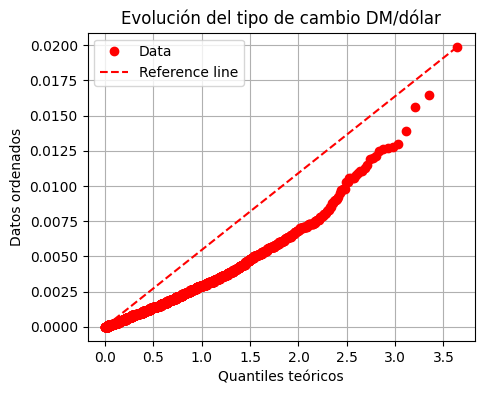

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import halfnorm

# Datos de muestra: diferencias en el tipo de cambio del marco alemán
# Diferencias absolutas
abs_diffdm = np.abs(diffdm)

# Ordenar datos
sorted_data = np.sort(abs_diffdm)

# Cuantiles teóricos de la distribución seminormal
quantiles = halfnorm.ppf((np.arange(1, len(sorted_data) + 1) - 0.5) / len(sorted_data))

# Gráfica
plt.figure(figsize=(5, 4))
plt.plot(quantiles, sorted_data, 'o', label='Data', color="red")
plt.plot([0, max(quantiles)], [0, max(sorted_data)], 'r--', label='Reference line')
plt.title("Evolución del tipo de cambio DM/dólar")
plt.xlabel("Quantiles teóricos")
plt.ylabel("Datos ordenados")
plt.legend()
plt.grid()
plt.show()

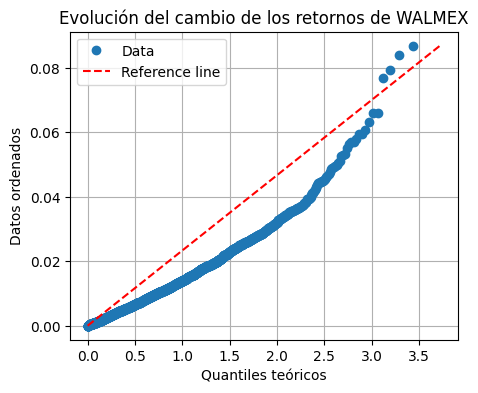

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import halfnorm

# Diferencias absolutas
abs_diffwm = np.abs(df_walmex['Return'])

# Ordenar datos
sorted_data = np.sort(abs_diffwm)

# Cuantiles teóricos de la distribución seminormal
quantiles = halfnorm.ppf((np.arange(1, len(sorted_data) + 1) - 0.5) / len(sorted_data))

# Gráfica
plt.figure(figsize=(5, 4))
plt.plot(quantiles, sorted_data, 'o', label='Data')
plt.plot([0, max(quantiles)], [0, max(sorted_data)], 'r--', label='Reference line')
plt.title("Evolución del cambio de los retornos de WALMEX")
plt.xlabel("Quantiles teóricos")
plt.ylabel("Datos ordenados")
plt.legend()
plt.grid()
plt.show()

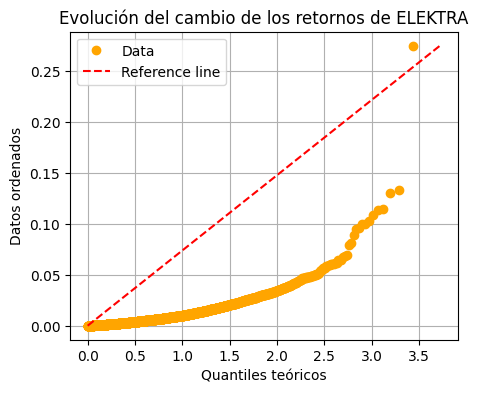

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import halfnorm

# Diferencias absolutas
abs_diffem = np.abs(df_elektra['Return'])

# Ordenar datos
sorted_data = np.sort(abs_diffem)

# Cuantiles teóricos de la distribución seminormal
quantiles = halfnorm.ppf((np.arange(1, len(sorted_data) + 1) - 0.5) / len(sorted_data))

# Gráfica
plt.figure(figsize=(5, 4))
plt.plot(quantiles, sorted_data, 'o', label='Data', color="orange")
plt.plot([0, max(quantiles)], [0, max(sorted_data)], 'r--', label='Reference line')
plt.title("Evolución del cambio de los retornos de ELEKTRA")
plt.xlabel("Quantiles teóricos")
plt.ylabel("Datos ordenados")
plt.legend()
plt.grid()
plt.show()

### Gráficas Q-Q

Una gráfica Q-Q es una gráfica de los cuantiles de una muestra o distribución contra los cuantiles de otra muestra o distribución.

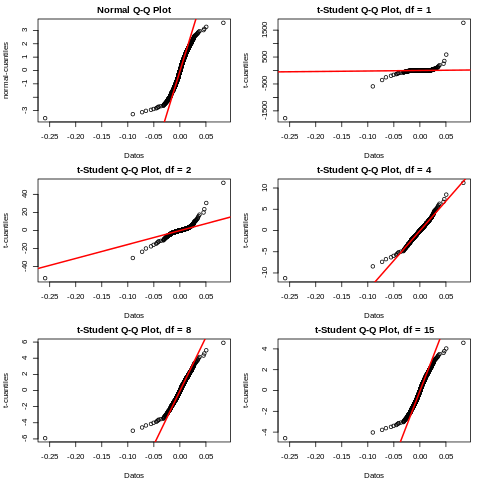

In [74]:
%%R
# Calcular los log-retornos del S&P 500, eliminando valores faltantes
log_returns <- log(1 + SPreturn)
log_returns <- na.omit(log_returns)

# Calcular cuartiles de los log-retornos
q1 <- quantile(log_returns, 0.25, na.rm = TRUE)
q3 <- quantile(log_returns, 0.75, na.rm = TRUE)

# Configurar la disposición de los gráficos (2 filas, 3 columnas)
par(mfrow = c(3, 2), mar = c(4, 4, 2, 1))

# Gráfico Q-Q para distribución normal con ejes invertidos
qqnorm(log_returns, datax = TRUE, main = "Normal Q-Q Plot", ylab = "Datos", xlab = "normal-cuantiles")
qqline(log_returns, col = "red", lwd = 2, datax = TRUE)  # Invertir el eje de datos

# Lista de grados de libertad para distribuciones t-Student
dfs <- c(1, 2, 4, 8, 15)

# Gráficos Q-Q para distribución t-Student con diferentes grados de libertad y ejes invertidos
for (df in dfs) {
  # Gráfico Q-Q con los ejes invertidos
  qqplot(sort(log_returns), qt(ppoints(length(log_returns)), df = df),
         main = paste("t-Student Q-Q Plot, df =", df),
         xlab = "Datos", ylab = "t-cuantiles")

  # Calcular la pendiente e intersección para la línea de referencia a través de los cuartiles
  slope <- (qt(0.75, df = df) - qt(0.25, df = df)) / (q3 - q1)
  intercept <- qt(0.25, df = df) - slope * q1

  # Trazar la línea de referencia usando los cuartiles
  abline(intercept, slope, col = "red", lwd = 2)
}

# Restaurar la disposición de gráficos original
par(mfrow = c(1, 1))



Veamos el caso de WALMEX

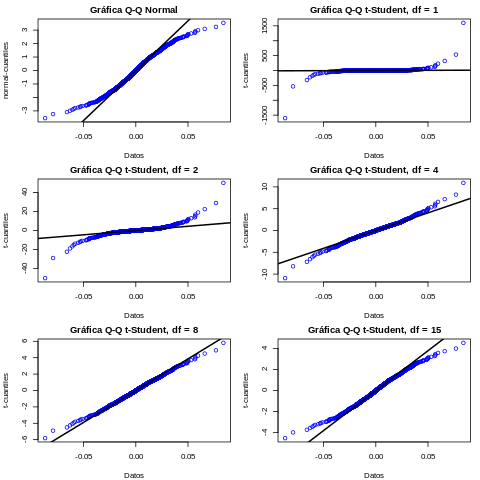

In [75]:
%%R
# WMreturn tiene los log-retornos de WALMEX eliminando valores faltantes
log_returns <- WMreturn
log_returns <- na.omit(log_returns)

# Calcular cuartiles de los log-retornos
q1 <- quantile(log_returns, 0.25, na.rm = TRUE)
q3 <- quantile(log_returns, 0.75, na.rm = TRUE)

# Configurar la disposición de los gráficos (2 filas, 3 columnas)
par(mfrow = c(3, 2), mar = c(4, 4, 2, 1))

# Gráfico Q-Q para distribución normal con ejes invertidos
qqnorm(log_returns, datax = TRUE, col = "blue", main = "Gráfica Q-Q Normal", ylab = "Datos", xlab = "normal-cuantiles")
qqline(log_returns, col = "black", lwd = 2, datax = TRUE)  # Invertir el eje de datos

# Lista de grados de libertad para distribuciones t-Student
dfs <- c(1, 2, 4, 8, 15)

# Gráficos Q-Q para distribución t-Student con diferentes grados de libertad y ejes invertidos
for (df in dfs) {
  # Gráfico Q-Q con los ejes invertidos
  qqplot(sort(log_returns), qt(ppoints(length(log_returns)), df = df),
         main = paste("Gráfica Q-Q t-Student, df =", df), col = "blue",
         xlab = "Datos", ylab = "t-cuantiles")

  # Calcular la pendiente e intersección para la línea de referencia a través de los cuartiles
  slope <- (qt(0.75, df = df) - qt(0.25, df = df)) / (q3 - q1)
  intercept <- qt(0.25, df = df) - slope * q1

  # Trazar la línea de referencia usando los cuartiles
  abline(intercept, slope, col = "black", lwd = 2)
}

# Restaurar la disposición de gráficos original
par(mfrow = c(1, 1))

y el caso de ELEKTRA

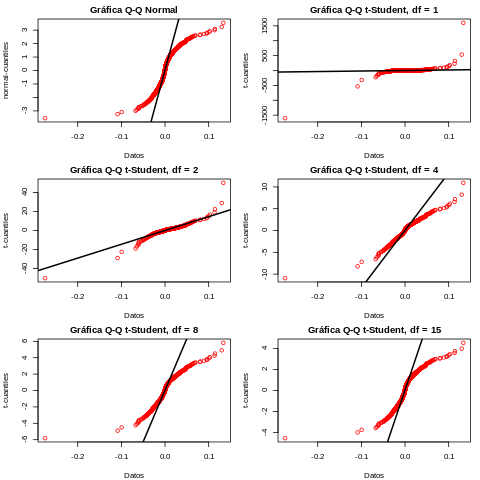

In [76]:
%%R
# EMreturn tiene los log-retornos de ELEKTRA, eliminando valores faltantes
log_returns <- EMreturn
log_returns <- na.omit(log_returns)

# Calcular cuartiles de los log-retornos
q1 <- quantile(log_returns, 0.25, na.rm = TRUE)
q3 <- quantile(log_returns, 0.75, na.rm = TRUE)

# Configurar la disposición de los gráficos (2 filas, 3 columnas)
par(mfrow = c(3, 2), mar = c(4, 4, 2, 1))

# Gráfico Q-Q para distribución normal con ejes invertidos
qqnorm(log_returns, datax = TRUE, col = "red", main = "Gráfica Q-Q Normal", ylab = "Datos", xlab = "normal-cuantiles")
qqline(log_returns, col = "black", lwd = 2, datax = TRUE)  # Invertir el eje de datos

# Lista de grados de libertad para distribuciones t-Student
dfs <- c(1, 2, 4, 8, 15)

# Gráficos Q-Q para distribución t-Student con diferentes grados de libertad y ejes invertidos
for (df in dfs) {
  # Gráfico Q-Q con los ejes invertidos
  qqplot(sort(log_returns), qt(ppoints(length(log_returns)), df = df),
         main = paste("Gráfica Q-Q t-Student, df =", df), col = "red",
         xlab = "Datos", ylab = "t-cuantiles")

  # Calcular la pendiente e intersección para la línea de referencia a través de los cuartiles
  slope <- (qt(0.75, df = df) - qt(0.25, df = df)) / (q3 - q1)
  intercept <- qt(0.25, df = df) - slope * q1

  # Trazar la línea de referencia usando los cuartiles
  abline(intercept, slope, col = "black", lwd = 2)
}

# Restaurar la disposición de gráficos original
par(mfrow = c(1, 1))

Ninguna de los las gráficas se ven exactamente lineales, pero la gráfica en  con $df=4$ es bastante recta la mayor parte de los datos. El modelo tiene extremadamente improbables pero no imposibles como el caso de Lunes Negro.

Los gráficos Q-Q son útiles no solo para comparar una muestra con un modelo teórico sino también para comparar dos muestras. Si dos muestras tienen los mismos tamaños podemos contruir su gráfica. De lo contrario, se calculan los mismos conjuntos de cuantiles para cada uno y los trazamos.

En *R* esto se hace automáticamente con el comando *qqplot()*.

La siguiente figura contiene gráficos Q-Q muestrales para los retornos S&P 500, los cambios en la tasa de DM/dólar y los cambios en el retorno libre de riesgo,.

Notemos que los retornos del S&P 500 tienen valores atípicos más extremos que las otras dos series. Los cambios en DM/dólar y los retornos sin riesgo tienen formas algo similares, pero el de los cambios en la tasa libre de riesgo tienen valores atípicos ligeramente más extremos en la cola izquierda.

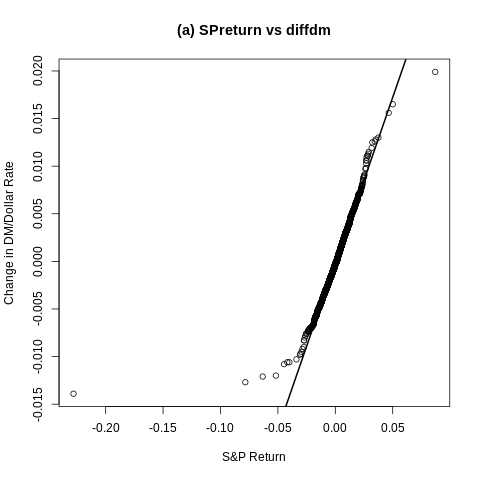

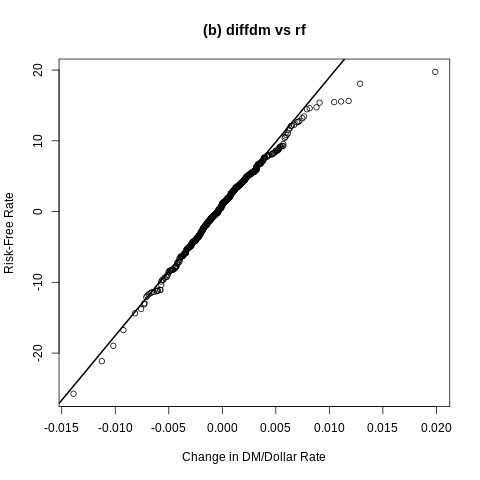

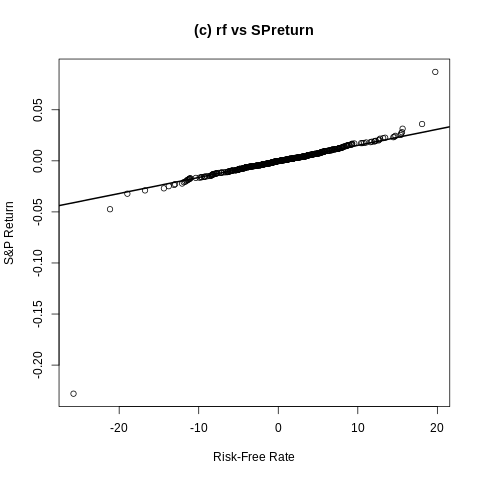

In [77]:
%%R
# Gráfico 1: S&P Return vs DM/Dollar Change
qqplot(SPreturn, diffdm, xlab = "S&P Return", ylab = "Change in DM/Dollar Rate", main = "(a) SPreturn vs diffdm")
xx <- quantile(SPreturn, c(0.25, 0.75), na.rm = TRUE)
yy <- quantile(diffdm, c(0.25, 0.75), na.rm = TRUE)
slope <- (yy[2] - yy[1]) / (xx[2] - xx[1])
inter <- yy[1] - slope * xx[1]
abline(inter, slope, lwd = 2)

# Gráfico 2: DM/Dollar Change vs Risk-Free Rate
qqplot(diffdm, rf, xlab = "Change in DM/Dollar Rate", ylab = "Risk-Free Rate", main = "(b) diffdm vs rf")
xx <- quantile(diffdm, c(0.25, 0.75), na.rm = TRUE)
yy <- quantile(rf, c(0.25, 0.75), na.rm = TRUE)
slope <- (yy[2] - yy[1]) / (xx[2] - xx[1])
inter <- yy[1] - slope * xx[1]
abline(inter, slope, lwd = 2)

# Gráfico 3: Risk-Free Rate vs S&P Return
qqplot(rf, SPreturn, xlab = "Risk-Free Rate", ylab = "S&P Return", main = "(c) rf vs SPreturn")
xx <- quantile(rf, c(0.25, 0.75), na.rm = TRUE)
yy <- quantile(SPreturn, c(0.25, 0.75), na.rm = TRUE)
slope <- (yy[2] - yy[1]) / (xx[2] - xx[1])
inter <- yy[1] - slope * xx[1]
abline(inter, slope, lwd = 2)

# Restaurar la disposición de gráficos original
par(mfrow = c(1, 1))



Veamos la comparación de cuantiles entre los retornos de WALMEX y ELEKTRA

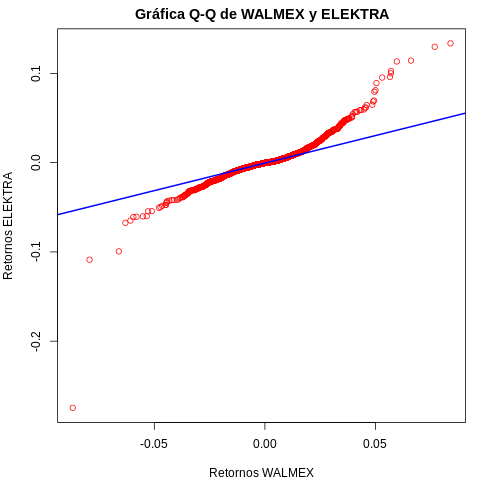

In [78]:
%%R
# Configurar la disposición de gráficos: 1 fila y 3 columnas
par(mfrow = c(1, 1), mar = c(4, 4, 2, 1))

# WMeturn vs EMreturn
qqplot(WMreturn, EMreturn, col = "red", xlab = "Retornos WALMEX", ylab = "Retornos ELEKTRA", main = "Gráfica Q-Q de WALMEX y ELEKTRA")
xx <- quantile(WMreturn, c(0.25, 0.75), na.rm = TRUE)
yy <- quantile(EMreturn, c(0.25, 0.75), na.rm = TRUE)
slope <- (yy[2] - yy[1]) / (xx[2] - xx[1])
inter <- yy[1] - slope * xx[1]
abline(inter, slope, col = "blue", lwd = 2)



## Pruebas de Normalidad

Al observar un gráfico de probabilidad normal es difícil evaluar si
la desviación de la linealidad es sistemática o si se debe a la variación muestral por lo que es útil realizar una prueba estadística de normalidad.

En esta revisión adoptaremos la prueba *Shapiro-Wilk* porque resulto ser mejor que sus competidoras (*Kolmogorov-Smirnov, Lilliefors, Cram ́er-vo Mises, Anderson-Darling, D’Agostino-Pearson, Jarque-Bera* y *chi-cuadrado*) tanto para alternativas simétricas y asimétricas de cola corta como de cola larga.

En este caso, la hipótesis nula es que la muestra proviene de una distribución normal y la alternativa es que la muestra proviene de una distribución no normal. La prueba *Shapiro-Wilk* de ambas hipótesis utiliza algo similar a un gráfico normal. Específicamente, relaciona las estadísticas de orden de la muestra $Y(i)$ y las estadísticas de orden normal esperadas que, para muestras grandes, están cerca de $Φ^{−1}\{i/(n + 1)\}$, los cuantiles de la distribución normal estándar. El vector de estadísticas de orden esperadas se multiplica por la inversa de su matriz de covarianza. Luego, la correlación entre este producto y las estadísticas de orden de la muestra se utiliza como estadística de prueba.

Las matrices de correlación y covarianza se analizarán con mayor detalle más adelante. Por ahora, solo se mencionarán algunos hechos.

La *covarianza* entre dos variables aleatorias $X$ e $Y$ es
$$
\text{Cov}(X, Y ) = \sigma_{XY} = E\Big[\{X − E(X)\}\{Y − E(Y )\}\Big]
$$
y el coeficiente de *correlación de Pearson* entre $X$ e $Y$ es
$$
\text{Corr}(X, Y ) = \rho_{XY} = \frac{\sigma_{XY} }{\sigma_X \sigma_Y}
$$

Una correlación $\rho_{XY}= 1$ indica una relación lineal positiva perfecta, donde $Y = \beta_0 + \beta_1\cdot X$ con $\beta_1 > 0$. En condiciones de normalidad, la correlación entre las estadísticas de
orden de la muestra y las estadísticas de orden normal esperadas deben ser cercanas a 1. Por otra parte, se rechaza la hipótesis nula de normalidad para valores pequeños del coeficiente de correlación. En *R*, la prueba de *Shapiro–Wilk* se puede implementar utilizando la función *shapiro.test()*.

### Prueba de Normalidad de Shapiro-Wilk en *R*

In [79]:
%%R
# Realiza la prueba de Shapiro-Wilk
shapiro_test_1 <- shapiro.test(SPreturn)
shapiro_test_2 <- shapiro.test(diffdm)
shapiro_test_3 <- shapiro.test(rf)

shapiro_test_4 <- shapiro.test(WMreturn)
shapiro_test_5 <- shapiro.test(EMreturn)

# Muestra los resultados
print(shapiro_test_1)
print(shapiro_test_2)
print(shapiro_test_3)
print(shapiro_test_4)
print(shapiro_test_5)


	Shapiro-Wilk normality test

data:  SPreturn
W = 0.84129, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  diffdm
W = 0.97524, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  rf
W = 0.98625, p-value = 8.68e-05


	Shapiro-Wilk normality test

data:  WMreturn
W = 0.98309, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  EMreturn
W = 0.80237, p-value < 2.2e-16



De acuerdo con los resultados, en todos los casos debemos rechazar la hipótesis nula. Sin embargo,
observemos que cualquier población real se desviará en cierta medida de la normalidad y cualquier desviación, sin importar cuán pequeña sea, se detectará con una muestra lo suficientemente grande. Cuando el tamaño de la muestra es grande, es importante observar los gráficos normales para ver si la desviación de la normalidad tiene importancia práctica. En el caso de las series  temporales financieras, la desviación de la normalidad en las colas suele ser lo suficientemente grande como para ser importante.

## Gráfica de Caja

La gráfica de caja es una herrramienta para comparar varias muestras. Observemos que la “caja” se extiende desde el primer hasta el tercer cuartil y, por lo tanto, proporciona el rango intercuartil o IQR por sus siglas en inglés. La línea en el medio de la caja corresponde a la *mediana* y las líneas discontinuas verticales que se extienden desde la parte superior e inferior de cada caja cubren los puntos de datos más pequeños y más grandes cuya distancia desde la parte inferior o superior de la caja es como máximo 1,5 veces el IQR.  Los extremos de estas líneas se indican mediante líneas horizontales.Todas las observaciones más allá de los extremos se representan con una
“o”.

### Gráfica de Caja no estandarizada

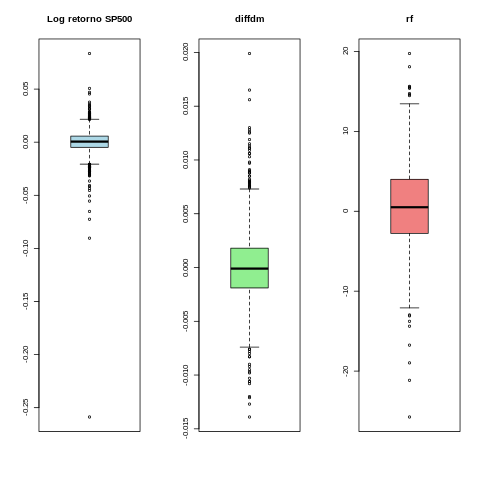

In [80]:
%%R
log_SPreturn <- log(SPreturn + 1)  # +1 para evitar valores negativos o cero en log
diffdm <- diffdm
rf <- rf

# Crear las gráficas de cajas para cada variable
par(mfrow = c(1, 3))  # Configurar la ventana gráfica para mostrar 3 gráficos en una fila

# Gráfica de cajas para SPreturn
boxplot(log_SPreturn, main="Log retorno SP500", col="lightblue")
boxplot(diffdm, main="diffdm", col="lightgreen")
boxplot(rf, main="rf", col="lightcoral")

# Restablecer la configuración de la ventana gráfica a la normalidad
par(mfrow = c(1, 1))

A continuación vemos las gráficas juntas

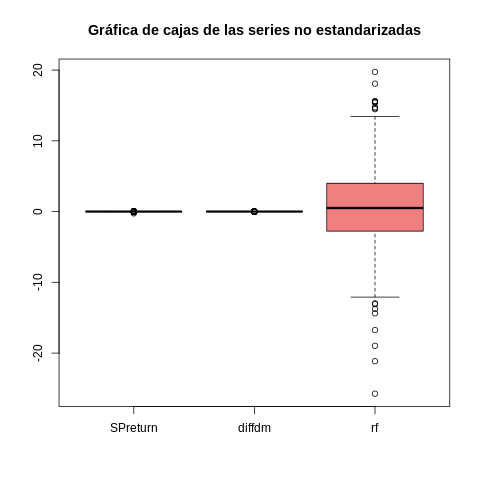

In [81]:
%%R
# Crear una gráfica de cajas con las tres series estandarizadas
boxplot(log_SPreturn, diffdm, rf,
        names = c("SPreturn", "diffdm", "rf"),  # Nombres de las series
        main = "Gráfica de cajas de las series no estandarizadas",
        col = c("lightblue", "lightgreen", "lightcoral"))   # Colores para cada caja

### Gráfica de Caja estandarizada

Como podemos observar, las diferencias de escala ocultan las diferencias de forma. Para solucionar este problema, se estandarizan las tres series restando la mediana y luego dividiéndolas por la MAD.

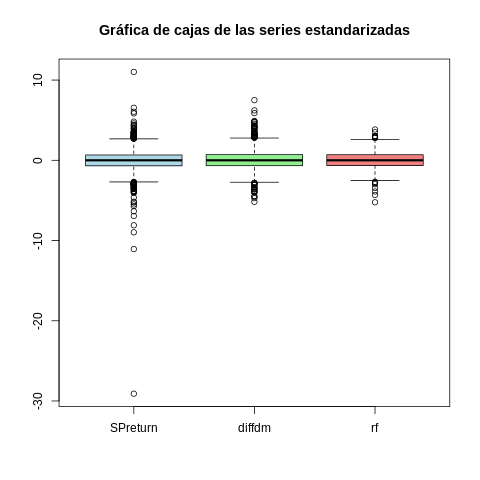

In [82]:
%%R
# Función para estandarizar con la mediana y el MAD
standardize <- function(x) {
  med <- median(x)
  mad_value <- mad(x)
  (x - med) / mad_value
}

# Estandarizar las tres series
std_SPreturn <- standardize(SPreturn)
std_diffdm <- standardize(diffdm)
std_rf <- standardize(rf)

# Crear una gráfica de cajas con las tres series estandarizadas
boxplot(std_SPreturn, std_diffdm, std_rf,
        names = c("SPreturn", "diffdm", "rf"),  # Nombres de las series
        main = "Gráfica de cajas de las series estandarizadas",
        col = c("lightblue", "lightgreen", "lightcoral"))   # Colores para cada caja


Dado hay que tener en cuenta las diferencias de escala, debemos observar los diagramas de caja de las variables tanto sin estandarización como con estandarización.

Al comparar varias muestras, los diagramas de caja y las gráficas Q-Q brindan diferentes vistas de los datos. Es mejor utilizar ambos. Sin embargo, si hay N muestras, entonces el número de diagramas Q-Q es $N(N − 1)/2$ o $N(N − 1)$ si, al intercambiar los ejes, se incluyen dos diagramas para cada par de muestras. Este número puede salirse de control rápidamente, por lo que, para valores grandes de $N$, se pueden utilizar diagramas de caja ampliados con algunos diagramas Q-Q seleccionados.

Veamos las gráficas de cajas correspondientes a los retornos de WALMEX y ELEKTRA. Como ya hemos aplicado el logaritmo al retorno obtenemos

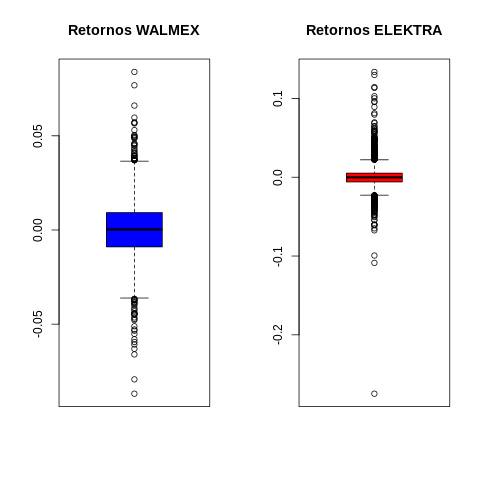

In [83]:
%%R
# Crear las gráficas de cajas para cada variable
par(mfrow = c(1, 2))  # Configurar la ventana gráfica para mostrar 3 gráficos en una fila

# Gráfica de cajas para SPreturn
boxplot(WMreturn, main="Retornos WALMEX", col="blue")
boxplot(EMreturn, main="Retornos ELEKTRA", col="red")

# Restablecer la configuración de la ventana gráfica a la normalidad
par(mfrow = c(1, 1))

podemos compararlas en una misma gráfica

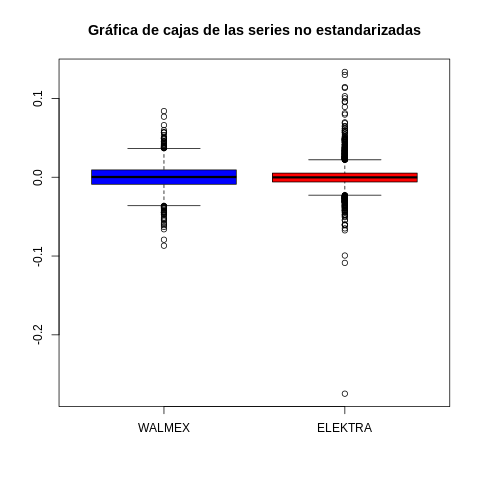

In [84]:
%%R
# Crear una gráfica de cajas con las series no estandarizadas
boxplot(WMreturn, EMreturn,
        names = c("WALMEX", "ELEKTRA"),  # Nombres de las series
        main = "Gráfica de cajas de las series no estandarizadas",
        col = c("blue", "red"))   # Colores para cada caja

y podemos obtener la gráfica de las series estandarizada

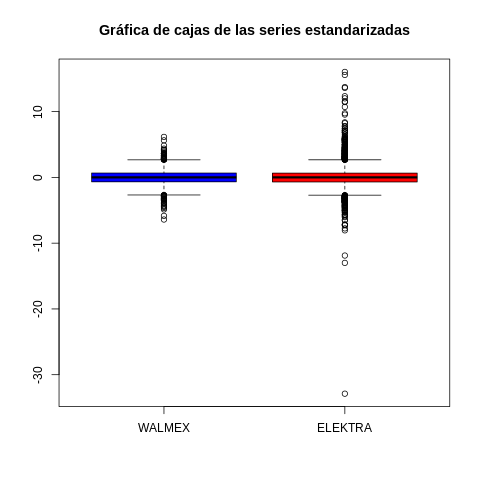

In [85]:
%%R
# Función para estandarizar con la mediana y el MAD
standardize <- function(x) {
  med <- median(x)
  mad_value <- mad(x)
  (x - med) / mad_value
}

WMreturn <- na.omit(WMreturn)
EMreturn <- na.omit(EMreturn)

# Estandarizar las series
std_WMreturn <- standardize(WMreturn)
std_EMreturn <- standardize(EMreturn)

# Crear una gráfica de cajas con las tres series estandarizadas
boxplot(std_WMreturn, std_EMreturn,
        names = c("WALMEX", "ELEKTRA"),  # Nombres de las series
        main = "Gráfica de cajas de las series estandarizadas",
        col = c("blue", "red"))   # Colores para cada caja

ELEKTRA tiene colas más pesadas que WALMEX.

Muchos métodos estadísticos funcionan mejor cuando los datos se distribuyen normalmente o al menos de manera simétrica y tienen una varianza constante. Al transformar los datos a menudo exhibirán menos asimetría y una varianza más constante en comparación con las variables originales, especialmente si la transformación se selecciona para inducir estas características.

## Transformación de Datos

Una transformación se denomina *estabilizadora de varianza* si elimina una dependencia entre la varianza condicional y la media condicional de una variable. Por ejemplo, si $Y$ tiene una distribución de Poisson con una media condicional que depende de $X$, entonces su varianza condicional es igual a la media condicional. Una transformación $h$ sería estabilizadora de varianza para $Y$ si la varianza condicional de $h(Y )$ no dependiera de la media condicional de $h(Y )$. Cuando la varianza condicional varía con la media condicional, las estimaciones pueden ser ineficientes y los intervalos de confianza o pruebas estadísticas pueden no ser fiables.

La transformación logarítmica es probablemente la transformación más usada. El logaritmo estabiliza la varianza de una variable cuya desviación estándar condicional es proporcional a su media condicional. Esto se ilustra en la siguiente figura, que representa gráficamente los cambios mensuales en el rendimiento sin riesgo (rf) (fila superior) y los cambios en el logaritmo del rendimiento (fila inferior) frente al rendimiento sin riesgo rezagado (columna izquierda) o el año (columna derecha). Observe que los cambios en el rendimiento son más variables cuando el rendimiento rezagado es mayor. Este comportamiento se denomina *varianza condicional no constante* o *heterocedasticidad condicional*. Vemos en la fila inferior que los cambios en el logaritmo del rendimiento tienen una variabilidad relativamente constante, al menos en comparación con los cambios en el rendimiento.

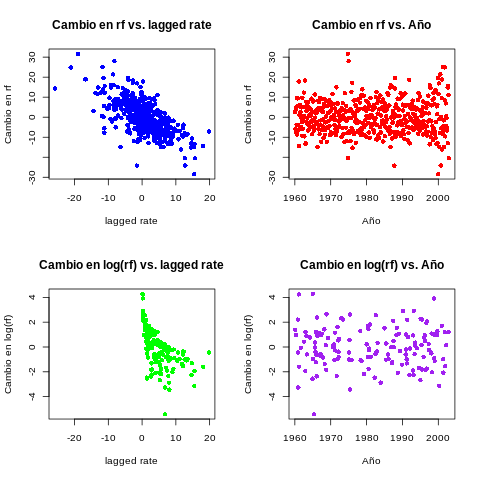

In [86]:
%%R
# Crear un vector de fechas basado en el número de observaciones
years <- 1960 + seq(0, length(rf) - 1) / 12

# Calcular los cambios en la tasa libre de riesgo
rf_change <- diff(rf)

# Crear las tasas en rezago (lagged rates)
rf_lagged <- c(NA, rf[-length(rf)])  # Mantener la longitud original agregando NA al inicio

# Aplicar el logaritmo a las tasas en rezago, evitando valores negativos
log_rf_lagged <- ifelse(rf_lagged > 0, log(rf_lagged), NA)

# Calcular los cambios en el logaritmo de la tasa libre de riesgo
log_rf <- log(rf)  # Aplicar logaritmo a la tasa original
log_rf_change <- diff(log_rf)

# Ajustar las longitudes de las series para las gráficas
# Quitar el primer valor de 'years' y eliminar los NA
years_valid <- years[-1]  # Porque diff(rf) tiene una longitud menor
valid_indices <- !is.na(rf_lagged[-1]) & !is.na(rf_change)  # Excluir los NA y alinear con 'diff'

# Crear versiones válidas de las series para el gráfico
rf_lagged_valid <- rf_lagged[-1][valid_indices]
rf_change_valid <- rf_change[valid_indices]
years_valid <- years_valid[valid_indices]

log_rf_lagged_valid <- log_rf_lagged[-1][valid_indices]
log_rf_change_valid <- log_rf_change[valid_indices]

# Crear un gráfico con 4 paneles
par(mfrow = c(2, 2))  # Dividir la pantalla en 2 filas y 2 columnas

# (a) Cambio en la tasa libre de riesgo versus la tasa rezagada
plot(rf_lagged_valid, rf_change_valid,
     main = "Cambio en rf vs. lagged rate",
     xlab = "lagged rate",
     ylab = "Cambio en rf",
     col = "blue", pch = 16)

# (b) Cambio en la tasa libre de riesgo versus año
plot(years_valid, rf_change_valid,
     main = "Cambio en rf vs. Año",
     xlab = "Año",
     ylab = "Cambio en rf",
     col = "red", pch = 16)

# (c) Cambio en log(tasa) versus tasa rezagada
plot(rf_lagged_valid, log_rf_change_valid,
     main = "Cambio en log(rf) vs. lagged rate",
     xlab = "lagged rate",
     ylab = "Cambio en log(rf)",
     col = "green", pch = 16)

# (d) Cambio en log(tasa libre de riesgo) versus año
plot(years_valid, log_rf_change_valid,
     main = "Cambio en log(rf) vs. Año",
     xlab = "Año",
     ylab = "Cambio en log(rf)",
     col = "purple", pch = 16)

# Restaurar los gráficos a una ventana de una sola gráfica
par(mfrow = c(1, 1))



### Transformación de Box-Cox

La transformación logarítmica a veces se incorpora a la familia de transformaciones de potencia mediante la llamada transformación de potencia de Box-Cox
$$
y^{(\alpha)} = \frac{y^{\alpha} - 1}{\alpha} \text{ si } \alpha \neq 0 \quad \text{ y }\quad y^{(\alpha)} = \log y \text{ si } \alpha = 0.
$$
La resta de 1 de $y^{\alpha}$ y la división por $\alpha$ no son esenciales, pero hacen que la transformación sea continua en $\alpha$ en $0$ ya que
$$
\lim_{\alpha\to 0}\frac{y^{\alpha} - 1}{\alpha} = \log y
$$

Nótese que la división por $\alpha$ asegura que la transformación sea creciente incluso cuando $\alpha < 0$. Esto es conveniente aunque no esencial. Para los propósitos de inducir simetría y una varianza constante, $y^{\alpha}$ e $y^{(\alpha)}$ funcionan igualmente bien y pueden usarse indistintamente, especialmente si, cuando $\alpha < 0$, $y^{\alpha}$ se reemplaza por $−y^{\alpha}$ para asegurar que la transformación sea monótonamente creciente para todos los valores de $\alpha$. El uso de una transformación monótonamente decreciente, en lugar de creciente, es inconveniente ya que las transformaciones decrecientes invierten el orden y, por ejemplo, transforman el cuartil $p$ en el cuartil $(1 − p)$.

Es común que la respuesta esté sesgada hacia la derecha y que la varianza de la respuesta condicional sea una función creciente de la media de la respuesta condicional. En tales casos, una transformación cóncava, por ejemplo, una transformación de Box-Cox con $\alpha < 1$, eliminará la asimetría y estabilizará la varianza. Si se utiliza una transformación de Box-Cox con $\alpha < 1$, entonces cuanto menor sea el valor de $\alpha$, mayor será el efecto de la transformación. Se puede ir demasiado lejos: si la respuesta transformada está sesgada hacia la izquierda o tiene una varianza condicional que disminuye como función de la media condicional, entonces se ha elegido un valor de $\alpha$ demasiado pequeño.

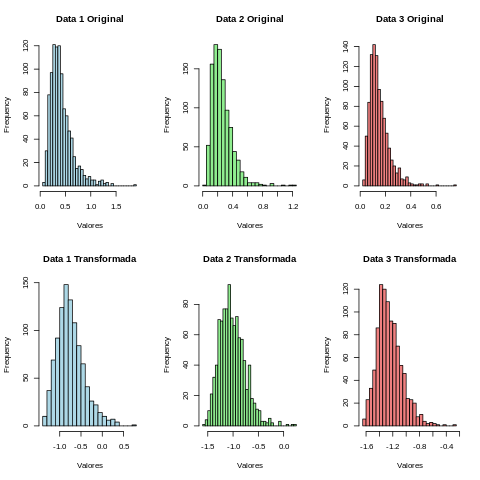

In [87]:
%%R
# Cargar las bibliotecas necesarias
library(MASS)  # Para la función boxcox

# Generar datos sesgados a la izquierda (distribuciones log-normal como ejemplo)
set.seed(123)
data1 <- rlnorm(1000, meanlog = -1, sdlog = 0.5)  # Datos sesgados a la izquierda
data2 <- rlnorm(1000, meanlog = -1.5, sdlog = 0.5)
data3 <- rlnorm(1000, meanlog = -2, sdlog = 0.5)

# Aplicar la transformación Box-Cox con alpha < 1 (λ en Box-Cox)
# Usamos 0.5 como ejemplo de α < 1
alpha <- 0.5
boxcox_transform <- function(x, alpha) {
  if (alpha == 0) {
    return(log(x))
  } else {
    return((x^alpha - 1) / alpha)
  }
}

# Aplicar la transformación a los datos
data1_transformed <- boxcox_transform(data1, alpha)
data2_transformed <- boxcox_transform(data2, alpha)
data3_transformed <- boxcox_transform(data3, alpha)

# Crear gráficos en paneles de 2 filas y 3 columnas
par(mfrow = c(2, 3))

# (a) Distribuciones originales
hist(data1, main = "Data 1 Original", xlab = "Valores", col = "lightblue", breaks = 30)
hist(data2, main = "Data 2 Original", xlab = "Valores", col = "lightgreen", breaks = 30)
hist(data3, main = "Data 3 Original", xlab = "Valores", col = "lightcoral", breaks = 30)

# (b) Distribuciones transformadas con Box-Cox
hist(data1_transformed, main = "Data 1 Transformada", xlab = "Valores", col = "lightblue", breaks = 30)
hist(data2_transformed, main = "Data 2 Transformada", xlab = "Valores", col = "lightgreen", breaks = 30)
hist(data3_transformed, main = "Data 3 Transformada", xlab = "Valores", col = "lightcoral", breaks = 30)

# Restaurar la configuración original de la pantalla de gráficos
par(mfrow = c(1, 1))


Por lo general, el valor de $\alpha$ que es mejor para simetrizar los datos no es el mismo valor de $\alpha$ que es mejor para estabilizar la varianza. En ese caso, se necesita un compromiso para que la transformación sea algo demasiado débil para un propósito y algo demasiado fuerte para el otro. Sin embargo, a menudo el compromiso no es severo y se pueden lograr casi simetría y homocedasticidad.

Todos los estimadores y pruebas estadísticas parten de ciertas suposiciones sobre la distribución de los datos. Se deben comprobar estas suposiciones y los métodos gráficos suelen ser la forma más conveniente de diagnosticar problemas. Si no se cumplen las suposiciones, es necesario saber qué tan sensible es el estimador o la prueba a las violaciones de las suposiciones. Si es probable que el estimador o la prueba se degraden seriamente por las violaciones de las suposiciones, lo que se denomina falta de robustez, entonces hay dos recursos. El primero es encontrar un nuevo estimador o prueba que sea adecuado para los datos. El segundo es transformar los datos de modo que los datos transformados satisfagan las suposiciones de la prueba o el estimador original.

En los casos de WALMEX y ELEKTRA al inicio calculamos el logaritmo del retorno por lo que tienen un comportamiento simétrico y una varianza constante.

## La Geometría de las Transformaciones

Las transformaciones inducen la normalidad de una distribución y estabilizan las varianzas porque pueden separar los datos en una región y juntar las observaciones en otras regiones. En la siguiente figura se ilustra este comportamiento al usar una transformación logaritmo. En el eje horizontal hay una muestra de datos de una distribución lognormal sesgada hacia la derecha, pero al aplicar la transformación tenemos en el eje vertical una distribución simétrica.

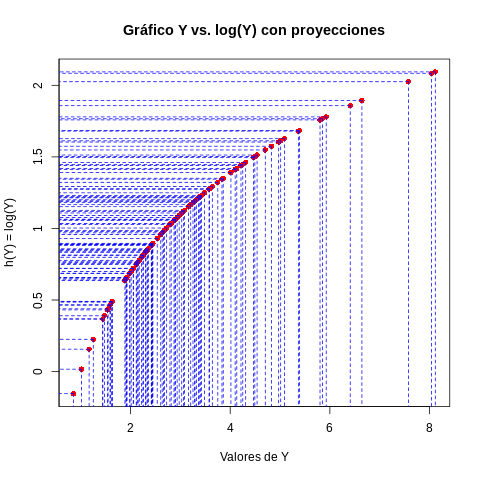

In [100]:
%%R
# Generar datos Y aleatorios (puedes usar cualquier conjunto de datos)
set.seed(123)
Y <- rlnorm(100, meanlog = 1, sdlog = 0.5)

# Aplicar la transformación logarítmica a Y
log_Y <- log(Y)

# Crear el gráfico Y vs. log(Y) con valores visibles en los ejes
plot(Y, log_Y,
     main = "Gráfico Y vs. log(Y) con proyecciones",
     xlab = "Valores de Y",
     ylab = "h(Y) = log(Y)",
     col = "red",
     pch = 16,
     yaxt = "n")  # Desactiva las etiquetas por defecto en el eje Y

# Agregar etiquetas personalizadas en el eje Y
axis(2, at = pretty(log_Y), labels = round(pretty(log_Y), 2))

# Dibujar líneas de proyección verticales y horizontales para cada punto
for (i in 1:length(Y)) {
  # Línea vertical (proyección al eje Y)
  segments(Y[i], log_Y[i], Y[i], par("usr")[3], col = "blue", lty = 2)
  # Línea horizontal (proyección al eje X)
  segments(Y[i], log_Y[i], par("usr")[1], log_Y[i], col = "blue", lty = 2)





La transformación $h(y)$ es el logaritmo. Los datos transformados se representan en el eje vertical. Las líneas discontinuas muestran la transformación de $y$ a $h(y)$ a medida que uno se mueve desde un valor y en el eje $x$ hacia arriba hasta la curva y luego a $h(y)$ en el eje $y$.

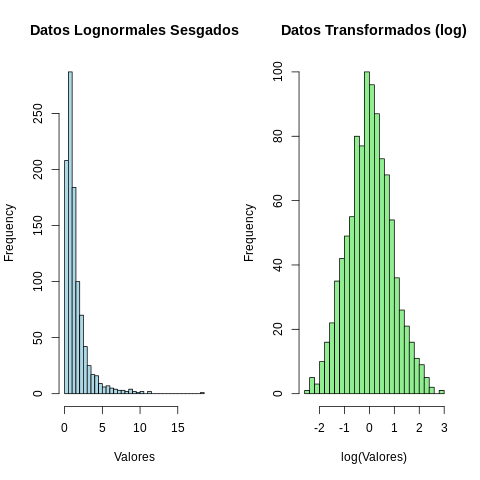

In [90]:
%%R
# Generar datos sesgados lognormales
set.seed(123)
lognormal_data <- rlnorm(1000, meanlog = 0, sdlog = 0.9)

# Aplicar la transformación logarítmica para simetrizar los datos
log_transformed_data <- log(lognormal_data)

# Crear gráficos antes y después de la transformación logarítmica
par(mfrow = c(1, 2))  # Dividir la pantalla en 1 fila y 2 columnas

# (a) Histograma de los datos lognormales sesgados
hist(lognormal_data,
     main = "Datos Lognormales Sesgados",
     xlab = "Valores",
     col = "lightblue",
     breaks = 30)

# (b) Histograma de los datos transformados logarítmicamente
hist(log_transformed_data,
     main = "Datos Transformados (log)",
     xlab = "log(Valores)",
     col = "lightgreen",
     breaks = 30)

# Restaurar la configuración de gráficos a una sola ventana
par(mfrow = c(1, 1))


 Observe la casi simetría de los datos transformados. Esta simetría se logra porque la transformación logarítmica separa los datos con valores pequeños y contrae los datos con valores grandes. Esto se puede ver observando la derivada de la función logarítmica. La derivada de $log(y)$ es $1/y$, que es una función decreciente de $y$.

Consideremos una transformación creciente arbitraria, $h(y)$. Si $x$ y $x'$ son dos puntos de datos cercanos que se transforman en $h(x)$ y $h(x')$, respectivamente, entonces la distancia entre los valores transformados es $|h(x) − h(x')| ≈ h^{(1)}(x)|x − x'|$. Por lo tanto, $h(x)$ y $h(x')$ se estiran para separarse cuando $h^{(1)}$ es grande y se juntan cuando $h^{(1)}$ es pequeño. Una función $h$ se llama *cóncava* si $h^{(1)}(y)$ es una función decreciente de $y$.

Las transformaciones cóncavas pueden eliminar la asimetría hacia la derecha.

Las transformaciones cóncavas también pueden estabilizar la varianza cuando los datos no transformados son tales que las observaciones pequeñas son menos variables que las observaciones grandes. Esto se ilustra en la siguiente figura

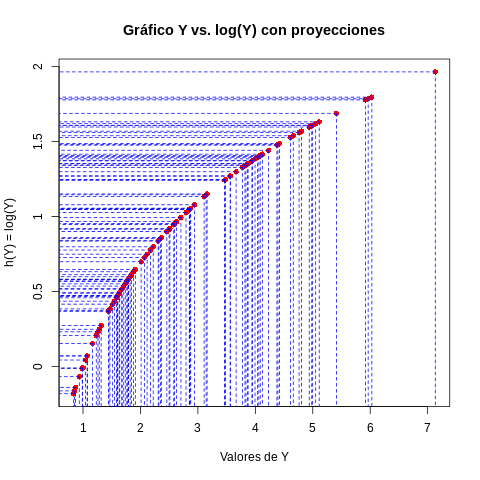

In [104]:
%%R
# Generar datos Y aleatorios (puedes usar cualquier conjunto de datos)
set.seed(89)
Y <- rlnorm(100, meanlog = 1, sdlog = 0.5)

# Aplicar la transformación logarítmica a Y
log_Y <- log(Y)

# Crear el gráfico Y vs. log(Y) con valores visibles en los ejes
plot(Y, log_Y,
     main = "Gráfico Y vs. log(Y) con proyecciones",
     xlab = "Valores de Y",
     ylab = "h(Y) = log(Y)",
     col = "red",
     pch = 16,
     yaxt = "n")  # Desactiva las etiquetas por defecto en el eje Y

# Agregar etiquetas personalizadas en el eje Y
axis(2, at = pretty(log_Y), labels = round(pretty(log_Y), 2))

# Dibujar líneas de proyección verticales y horizontales para cada punto
for (i in 1:length(Y)) {
  # Línea vertical (proyección al eje Y)
  segments(Y[i], log_Y[i], Y[i], par("usr")[3], col = "blue", lty = 2)
  # Línea horizontal (proyección al eje X)
  segments(Y[i], log_Y[i], par("usr")[1], log_Y[i], col = "blue", lty = 2)


Hay dos grupos de respuestas, uno con una media aproximada de 2 y una varianza relativamente pequeña y otro con una media de 4 y una varianza relativamente grande. Si el valor esperado de la respuesta $Y_i$, condicional a $X_i$, siguiera un modelo de regresión $m(X_i; \beta)$, entonces se producirían dos grupos como estos si hubiera dos valores posibles de $X_i$, uno con un valor pequeño de $m(X_i; \beta)$ y el otro con un valor grande. Debido a la concavidad de la transformación $h$, la varianza del grupo con una media de 4 se reduce por la transformación. Después de la transformación, los grupos tienen casi la misma varianza, como se puede ver al observar la dispersión de los dos grupos en el eje $y$.

La fuerza de una transformación se puede medir por cuánto cambia su derivada en un intervalo, por ejemplo, de $a$ a $b$. Más precisamente, para $a < b$, la fuerza de una transformación creciente $h$ es la razón de la derivada $h'(b)/h'(a)$. Si la transformación es cóncava, entonces la razón de la derivada es menor que 1 y cuanto menor sea la razón, más fuerte será la concavidad. Por el contrario, si la transformación es convexa, entonces la razón de la derivada es mayor que 1 y cuanto mayor sea la razón, mayor será la convexidad. Para una transformación Box-Cox, la razón de la derivada es $(b/a)^{\alpha−1}$ y, por lo tanto, depende de $a$ y $b$ solo a través de la razón $b/a$. La figura se muestra la razón de la derivada de las transformaciones Box-Cox cuando $b/a = 2$. Se puede ver que la transformación Box-Cox es cóncava cuando $\alpha < 1$, y la concavidad se hace más fuerte a medida que α disminuye. De manera similar, la transformación es convexa para $\alpha > 1$, con convexidad creciente a medida que $\alpha$ aumenta.

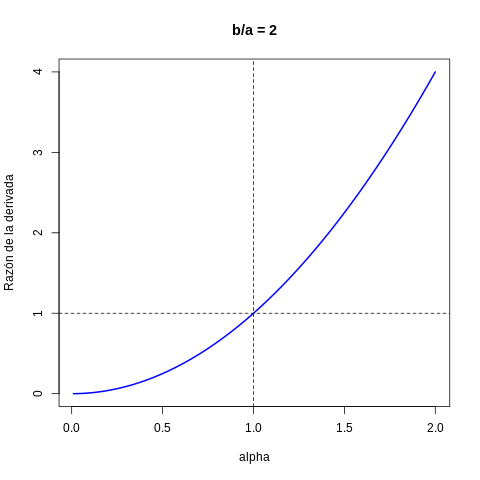

In [92]:
%%R
# Definir la función de derivada de Box-Cox
boxcox_derivative <- function(y, alpha) {
  return(y^(alpha-1))
}

# Crear un rango de valores para y
y_vals <- seq(0.01, 2, length.out = 100)  # Evitar 0 para evitar problemas numéricos

# Calcular las derivadas para diferentes valores de alpha
alpha_vals <- c(3)  # Ejemplos de valores para alpha (convexo en este caso)
colors <- c("blue")

# Graficar la derivada
plot(y_vals, boxcox_derivative(y_vals, alpha_vals[1]),
     type = "l",
     col = colors[1],
     lwd = 2,
     xlab = "alpha",
     ylab = "Razón de la derivada",
     main = "b/a = 2")

# Añadir una línea vertical y horizontal en el origen
abline(v = 1, lty = 2)  # Línea punteada vertical en y = 0
abline(h = 1, lty = 2)  # Línea punteada horizontal en derivada = 0

La fuerza de una transformación de Box-Cox se ilustra en la siguiente figura donde las correlaciones entre los rendimientos de interés libres de riesgo rezagados, $r_{t−1}$, y los cambios absolutos y al cuadrado, $|r^{(α)}_t − r^{(α)}_{t−1}|$ y $\{r^{(α)}_t −r^{(α)}_{t−1}\}^2$, en la tasa transformada se grafican en relación con $\alpha$. ​​Las dos correlaciones son similares, especialmente cuando están cerca de cero. Cualquier desviación de las correlaciones con respecto a cero indica heterocedasticidad condicional, donde la desviación estándar del cambio en la tasa transformada depende del valor anterior de la tasa. Vemos que las correlaciones disminuyen a medida que α disminuye con respecto a 1, de modo que la concavidad de la transformación aumenta. Las correlaciones son iguales a cero cuando α está muy cerca de 0, es decir, la transformación logarítmica. Si $\alpha$ está muy por debajo de 0, entonces la transformación es demasiado fuerte y la sobretransformación induce una correlación negativa, lo que indica que la desviación estándar condicional es una función decreciente de la tasa rezagada.

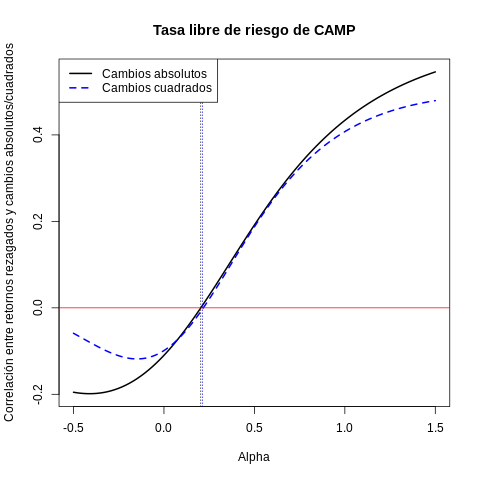

In [123]:
%%R
# Paquete necesario para la transformación de Box-Cox
library(MASS)

# Definir la función Box-Cox
boxcox_transform <- function(y, alpha) {
  if (alpha == 0) {
    return(log(y))  # Si alpha es 0, usar logaritmo
  } else {
    return((y^alpha - 1) / alpha)
  }
}

# Simular datos de retorno libre de riesgo
rf <- Capm$rdur  # Usando los datos de Capm$rdur

# Calcular retornos rezagados
rf_lagged <- rf[-length(rf)]
rf_lagged <- c(NA, rf_lagged)

# Definir un rango de valores de alpha, incluyendo valores negativos
alpha_vals <- seq(-0.5, 1.5, length.out = 200)

# Inicializar vectores para almacenar correlaciones
cor_abs_change <- numeric(length(alpha_vals))
cor_sq_change <- numeric(length(alpha_vals))

# Calcular las correlaciones para cada valor de alpha
for (i in 1:length(alpha_vals)) {
  alpha <- alpha_vals[i]

  # Transformar los retornos usando Box-Cox
  rf_transformed <- boxcox_transform(rf, alpha)

  # Calcular los cambios absolutos y cuadrados en los retornos transformados
  abs_change <- abs(diff(rf_transformed))
  sq_change <- diff(rf_transformed)^2

  # Calcular la correlación con los retornos rezagados
  cor_abs_change[i] <- cor(rf_lagged[-1], abs_change, use = "complete.obs")
  cor_sq_change[i] <- cor(rf_lagged[-1], sq_change, use = "complete.obs")
}

# Graficar los resultados
plot(alpha_vals, cor_abs_change, type = "l", lwd = 2, col = "black",
     ylab = "Correlación entre retornos rezagados y cambios absolutos/cuadrados", xlab = "Alpha",
     main = "Tasa libre de riesgo de CAMP")
lines(alpha_vals, cor_sq_change, lty = 2, lwd = 2, col = "blue")

# Añadir líneas horizontales en h = 0
abline(h = 0, lty = 1, col = "red")  # Línea horizontal en h = 0

# Identificar los puntos donde las curvas intersectan con h = 0
intersect_abs <- which(abs(diff(sign(cor_abs_change))) == 2)
intersect_sq <- which(abs(diff(sign(cor_sq_change))) == 2)

# Dibujar líneas verticales en los puntos de intersección
abline(v = alpha_vals[intersect_abs], col = "black", lty = 3)  # Para la curva de cambios absolutos
abline(v = alpha_vals[intersect_sq], col = "blue", lty = 3)    # Para la curva de cambios cuadrados

# Añadir leyenda
legend("topleft", legend = c("Cambios absolutos", "Cambios cuadrados"),
       lty = c(1, 2), col = c("black", "blue"), lwd = 2)


## Transformación del KDE

El estimador de densidad de núcleo (KDE) es popular debido a su simplicidad y a que está disponible en la mayoría de las plataformas de software. Sin embargo, el KDE tiene algunas desventajas. Una desventaja del KDE es que suaviza de manera insuficiente las densidades con colas largas. Por ejemplo, la curva sólida de la siguiente figura es un KDE de las ganancias anuales entre los años 1988-1989 para 1109 personas. Los datos están en el conjunto de datos de Ganancias del paquete *Ecdat* de *R*.

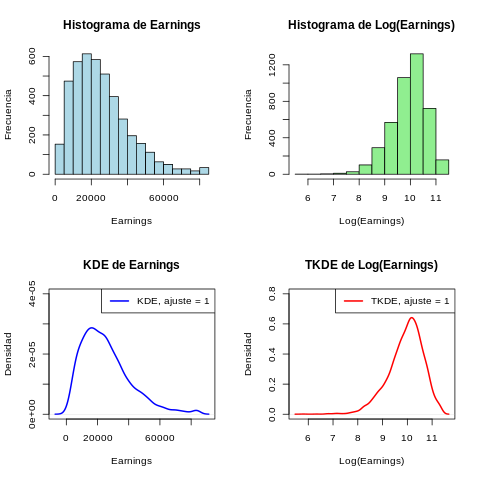

In [209]:
%%R
# Configurar la retícula 2x2
par(mfrow = c(2, 2))

# Graficar el histograma de Earnings$y
hist(Earnings$y, main = "Histograma de Earnings",
     xlab = "Earnings", ylab = "Frecuencia", col = "lightblue", border = "black")

# Graficar el histograma de log(Earnings$y)
hist(log(Earnings$y), main = "Histograma de Log(Earnings)",
     xlab = "Log(Earnings)", ylab = "Frecuencia", col = "lightgreen", border = "black")

# Graficar el KDE de Earnings$y
kde_default <- density(Earnings$y)
plot(kde_default, main = "KDE de Earnings",
     xlab = "Earnings", ylab = "Densidad", col = "blue", lwd = 2, ylim = c(0, 0.00004))
# Añadir leyenda
legend("topright", legend = c("KDE, ajuste = 1"), col = c("blue"), lwd = 2)

# Graficar el TKDE de log(Earnings$y)
tkde_default <- density(log(Earnings$y))
plot(tkde_default, main = "TKDE de Log(Earnings)",
     xlab = "Log(Earnings)", ylab = "Densidad", col = "red", lwd = 2, ylim = c(0, 0.8))
# Añadir leyenda
legend("topright", legend = c("TKDE, ajuste = 1"), col = c("red"), lwd = 2)

# Restablecer los parámetros gráficos
par(mfrow = c(1, 1))

La cola larga derecha de la estimación de densidad muestra protuberancias, que parecen deberse únicamente a la variación aleatoria de los datos, no a protuberancias en la densidad real. El problema es que no hay un único ancho de banda que funcione bien tanto en el centro de los datos como en la cola derecha. El selector automático de ancho de banda eligió un ancho de banda predefinido, suavizando de manera insuficiente en las colas y quizás suavizando de manera excesiva en el centro. El último problema puede provocar que se subestime la altura de la densidad en el modo o modos.

Se puede obtener una mejor estimación de la densidad mediante el estimador de densidad de núcleo de transformación (TKDE). La idea es transformar los datos de modo que la densidad de los datos transformados sea más fácil de estimar mediante el KDE.

A continuación vemos un ejemplo usando la raíz cuadrada.

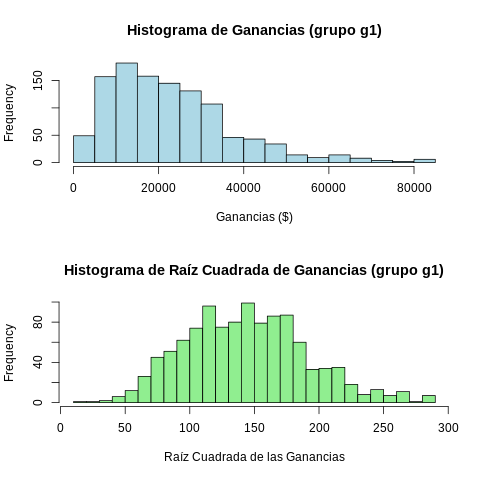

In [195]:
%%R
# Cargar la librería necesaria
library(Ecdat)

# Cargar el conjunto de datos de Earnings
data("Earnings")

# Filtrar los datos para incluir solo el grupo de edad "g1"
earnings_g1 <- Earnings[Earnings$age == "g1", ]

# Extraer la columna de ganancias (y) para el grupo g1
earnings <- earnings_g1$y

# Calcular la raíz cuadrada de las ganancias
sqrt_earnings <- sqrt(earnings)

# Crear un gráfico con 2 paneles
par(mfrow = c(2, 1))  # Dividir la ventana gráfica en 1 fila y 2 columnas

# (a) Histograma de las ganancias
hist(earnings,
     main = "Histograma de Ganancias (grupo g1)",
     xlab = "Ganancias ($)",
     col = "lightblue",
     border = "black",
     breaks = 20)

# (b) Histograma de la raíz cuadrada de las ganancias
hist(sqrt_earnings,
     main = "Histograma de Raíz Cuadrada de Ganancias (grupo g1)",
     xlab = "Raíz Cuadrada de las Ganancias",
     col = "lightgreen",
     border = "black",
     breaks = 20)

# Restaurar la configuración de gráficos original
par(mfrow = c(1, 1))


### Cambio de variable

Por supuesto, nos interesa la densidad de las ganancias, no la densidad de sus raíces cuadradas. Sin embargo, es fácil convertir una estimación de esta última en una de las primeras. Para ello, se utiliza la fórmula de cambio de variable:

Si $X = g(Y )$, donde $g$ es monótona y $f_X$ y $f_Y$ son las densidades de $X$ e $Y$ , respectivamente, entonces
$$
f_Y (y) = f_X\{g(y)\} |g'(y)|
$$
Por ejemplo, si $x = g(y) = \sqrt{y}$, entonces $g'(y) = y^{−1/2}/2$ y
$$
f_Y (y) = \frac{\{f_X(\sqrt{y})y^{−1/2}\}}{2}.
$$
Sustituyendi $y = g^{−1}(x)$ obtenemos que
$$
f_Y \{g^{−1}(x)\} = f_X(x)|g'\{g^{−1}(x)\}|.
$$
La ecuación anterior un método para calcular TKDE:

1. Comenzamos con los datos $Y_1,...,Y_n$;
2. Transformamos los datos a $X_1 = g(Y_1),...,X_n = g(Y_n)$;
3. Sea $\hat{f}_X$ el KDE calculado sobre la retícula $x_1,...,x_m$ usando $X_1,...,X_n$;
4. Grafica las parejas $\big( g^{−1}(x_j), \hat{f}_X(x_j)|g'\{g^{−1}(x_j)\}|\big)$ con $j = 1,...,m$.

La curva roja de la siguiente figura es un gráfico de la TKDE de los datos de ganancias utilizando la transformación de raíz cuadrada. Observe la cola derecha más suave, la disminución más rápida hasta 0 en el límite izquierdo y el pico algo más pronunciado en la moda en comparación con la KDE (curva sólida).

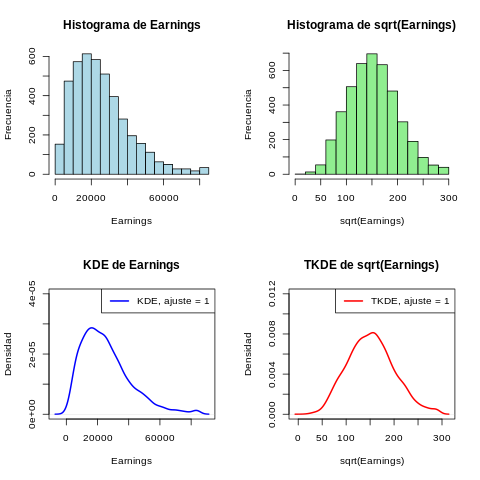

In [224]:
%%R
# Configurar la retícula 2x2
par(mfrow = c(2, 2))

# Graficar el histograma de Earnings$y
hist(Earnings$y, main = "Histograma de Earnings",
     xlab = "Earnings", ylab = "Frecuencia", col = "lightblue", border = "black")

# Graficar el histograma de log(Earnings$y)
hist(sqrt(Earnings$y), main = "Histograma de sqrt(Earnings)",
     xlab = "sqrt(Earnings)", ylab = "Frecuencia", col = "lightgreen", border = "black")

# Graficar el KDE de Earnings$y
kde_default <- density(Earnings$y)
plot(kde_default, main = "KDE de Earnings",
     xlab = "Earnings", ylab = "Densidad", col = "blue", lwd = 2, ylim = c(0, 0.00004))
# Añadir leyenda
legend("topright", legend = c("KDE, ajuste = 1"), col = c("blue"), lwd = 2)

# Graficar el TKDE de log(Earnings$y)
tkde_default <- density(sqrt(Earnings$y))
plot(tkde_default, main = "TKDE de sqrt(Earnings)",
     xlab = "sqrt(Earnings)", ylab = "Densidad", col = "red", lwd = 2, ylim = c(0, 0.012))
# Añadir leyenda
legend("topright", legend = c("TKDE, ajuste = 1"), col = c("red"), lwd = 2)

# Restablecer los parámetros gráficos
par(mfrow = c(1, 1))

Al utilizar un TKDE, es importante elegir una buena transformación. Para variables positivas y sesgadas hacia la derecha, como los datos de ingresos, se necesita una transformación cóncava. Una transformación de potencia, y $α$, para algunos $α < 1$ es una opción común. Aunque existen métodos automáticos para elegir $α$, el método de prueba y error suele ser suficiente.

## Glosario

* *Serie de tiempo*: es sucesión de observaciones de alguna cantidad o cantidades en el tiempo.
* *Gráfica de series de tiempo*: es una gráfica de una serie de tiempo en orden cronólogico.
* *Serie de tiempo estacionaria*: Una serie de tiempo estacionaria es una serie temporal cuyos propiedades estadísticas (media, varianza, autocorrelación, etc.) no cambian con el tiempo.
* *Agrupación de volatilidad*: es un fenómeno común en series temporales financieras donde periodos de alta volatilidad tienden a ser seguidos por otros periodos de alta volatilidad, y periodos de baja volatilidad tienden a ser seguidos por otros periodos de baja volatilidad. Este comportamiento es indicativo de que la volatilidad no es constante a lo largo del tiempo y sugiere la presencia de dependencia temporal en las varianzas de los retornos.
* *Distribución marginal*: se refiere a la distribución de una sola variable dentro de un conjunto de variables. Es útil cuando quieres entender el comportamiento de una variable en particular, independientemente de las demás.  
* *Distribución incondicional*: se refiere a la distribución de los retornos de una acción sin considerar ningún otro factor.
* *Modelo estadístico paramétrico*: es un tipo de modelo en el cual se asume que los datos siguen una distribución específica que está caracterizada por un conjunto de parámetros finitos.
* *Desviación media absoluta*: es una medida robusta de la dispersión estadística.